In [ ]:
# Instala a versão exata do scikit-learn com a qual o modelo foi salvo.

!pip install "numpy<2.0" scikit-learn pmdarima statsmodels joblib -U

In [ ]:
# importando bibliotecas

# Biliotecas para manipulação de dados pandas
import pandas as pd
# Bilioteca para manipulação de arrays python
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta
import time
# Função para distribuir aleatoriamente dados usand scikilearn
from sklearn.model_selection import train_test_split
#usada para o pré-processamento de daddos, minmax e standard para dimensionar e padronizar e o onehot para codificar variáveis em formato numérico
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
# Pipe line sklearn
from sklearn.pipeline import Pipeline
#classificador redes neurais com MLP
from sklearn.neural_network import MLPClassifier
# Graficos em python
import matplotlib.pyplot as plt
# Importando metricas para aferição do modelo
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
# Platando curva ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.impute import SimpleImputer

#importa metricas
from sklearn import metrics

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import GridSearchCV
import joblib

from tqdm import tqdm

# Importamos as bibliotecas necessárias
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import keras
import tensorflow as tf
from keras.metrics import Precision, Recall, F1Score, SparseCategoricalAccuracy # [1]

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC




In [ ]:
# importando datasets de treino e test

# data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DDOS-SLORIS/CICIDS2017/New_CIC-2017.csv', low_memory=False)
data = pd.read_csv('path/CIC2017_1132_features_extrated.csv', low_memory=False)
data.head()


Dst Port  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0        80          38308             1             1                6   
1       389            479            11             5              172   
2        88           1095            10             6             3150   
3       389          15206            17            12             3452   
4        88           1092             9             6             3150   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                6                6                6          6.000000   
1              326               79                0         15.636364   
2             3150             1575                0        315.000000   
3             6660             1313                0        203.058823   
4             3152             1575                0        350.000000   

   Fwd Pkt Len Std  ...  Idle Min_ARIMA_forecast_2  Idle Min_ARIMA_forecast_3  \
0         0.000000  ...               1.104441e+06              979028.757647   
1        31.449238  ...               9.790288e+05              926504.082905   
2       632.561635  ...               9.265041e+05              893188.591632   
3       425.778474  ...               8.931886e+05              873763.115207   
4       694.509719  ...               8.737631e+05              860453.163786   

   Idle Min_ARIMA_forecast_4  Idle Min_ARIMA_forecast_5  \
0              926504.082905              893188.591632   
1              893188.591632              873763.115207   
2              873763.115207              860453.163786   
3              860453.163786              851986.646158   
4              851986.646158              846199.079134   

   Bwd IAT Mean_holder_j5  Bwd IAT Min_holder_j5  Fwd Seg Size Min_holder_j5  \
0                     0.0                    0.0                         0.0   
1                     0.0                    0.0                         0.0   
2                     0.0                    0.0                         0.0   
3                     0.0                    0.0                         0.0   
4                     0.0                    0.0                         0.0   

   Active Mean_holder_j5  Active Min_holder_j5   Label  
0                    0.0                   0.0  Benign  
1                    0.0                   0.0  Benign  
2                    0.0                   0.0  Benign  
3                    0.0                   0.0  Benign  
4                    0.0                   0.0  Benign  

[5 rows x 1132 columns]

In [6]:
feature_selected = 100
num_holder_feat = 1

In [7]:
label = data['Label']
data = data.drop(['Label'], axis=1)

In [8]:
data.head()

Dst Port  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
0        80          38308             1             1                6   
1       389            479            11             5              172   
2        88           1095            10             6             3150   
3       389          15206            17            12             3452   
4        88           1092             9             6             3150   

   TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  Fwd Pkt Len Mean  \
0                6                6                6          6.000000   
1              326               79                0         15.636364   
2             3150             1575                0        315.000000   
3             6660             1313                0        203.058823   
4             3152             1575                0        350.000000   

   Fwd Pkt Len Std  ...  Idle Min_ARIMA_forecast_1  Idle Min_ARIMA_forecast_2  \
0         0.000000  ...               1.471640e+06               1.104441e+06   
1        31.449238  ...               1.104441e+06               9.790288e+05   
2       632.561635  ...               9.790288e+05               9.265041e+05   
3       425.778474  ...               9.265041e+05               8.931886e+05   
4       694.509719  ...               8.931886e+05               8.737631e+05   

   Idle Min_ARIMA_forecast_3  Idle Min_ARIMA_forecast_4  \
0              979028.757647              926504.082905   
1              926504.082905              893188.591632   
2              893188.591632              873763.115207   
3              873763.115207              860453.163786   
4              860453.163786              851986.646158   

   Idle Min_ARIMA_forecast_5  Bwd IAT Mean_holder_j5  Bwd IAT Min_holder_j5  \
0              893188.591632                     0.0                    0.0   
1              873763.115207                     0.0                    0.0   
2              860453.163786                     0.0                    0.0   
3              851986.646158                     0.0                    0.0   
4              846199.079134                     0.0                    0.0   

   Fwd Seg Size Min_holder_j5  Active Mean_holder_j5  Active Min_holder_j5  
0                         0.0                    0.0                   0.0  
1                         0.0                    0.0                   0.0  
2                         0.0                    0.0                   0.0  
3                         0.0                    0.0                   0.0  
4                         0.0                    0.0                   0.0  

[5 rows x 1131 columns]

In [9]:
dt = data.copy()

In [ ]:
y = label.copy()
x = dt.copy()
y = y.fillna(0)

# Substituir valores infinitos por NaN
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [12]:
selector = SelectKBest(score_func=f_classif, k=feature_selected)  # Mantendo as 23 melhores
newfeature = selector.fit_transform(x, y)

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [  43   44   45   46   47   48  409  410  411  412  413  414  415  416
  417  418  419  420  421  422  423  424  425  426  427  428  429  430
  431  432  433  434  435  436  437  438  439  440  441  442  443  444
  445  446  447  448  449  450  451  452  453  454  455  456 1127] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
cols = selector.get_support(indices=True)
newfeature = dt.iloc[:,cols]

In [14]:
print(f'Linhas: {dt.shape[0]}')
print(f'Colunas: {dt.shape[1]}')

Linhas: 16497
Colunas: 1131


In [15]:
newfeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16497 entries, 0 to 16496
Data columns (total 100 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Fwd Seg Size Min                   16497 non-null  int64  
 1   Active Min                         16497 non-null  int64  
 2   Dst Port_SMA_12                    16497 non-null  float64
 3   Dst Port_EMA_12                    16497 non-null  float64
 4   Bwd Pkt Len Max_SMA_6              16497 non-null  float64
 5   Bwd Pkt Len Max_EMA_6              16497 non-null  float64
 6   Bwd Pkt Len Max_SMA_9              16497 non-null  float64
 7   Bwd Pkt Len Max_EMA_9              16497 non-null  float64
 8   Bwd Pkt Len Max_SMA_12             16497 non-null  float64
 9   Bwd Pkt Len Max_EMA_12             16497 non-null  float64
 10  Bwd Pkt Len Mean_SMA_12            16497 non-null  float64
 11  Bwd Pkt Len Mean_EMA_12            16497 non-null  fl

In [16]:
rotulos = newfeature.columns
print(rotulos)

Index(['Fwd Seg Size Min', 'Active Min', 'Dst Port_SMA_12', 'Dst Port_EMA_12',
       'Bwd Pkt Len Max_SMA_6', 'Bwd Pkt Len Max_EMA_6',
       'Bwd Pkt Len Max_SMA_9', 'Bwd Pkt Len Max_EMA_9',
       'Bwd Pkt Len Max_SMA_12', 'Bwd Pkt Len Max_EMA_12',
       'Bwd Pkt Len Mean_SMA_12', 'Bwd Pkt Len Mean_EMA_12',
       'Bwd Seg Size Avg_SMA_12', 'Bwd Seg Size Avg_EMA_12',
       'Fwd Seg Size Min_SMA_3', 'Fwd Seg Size Min_EMA_3',
       'Fwd Seg Size Min_SMA_6', 'Fwd Seg Size Min_EMA_6',
       'Fwd Seg Size Min_SMA_9', 'Fwd Seg Size Min_EMA_9',
       'Fwd Seg Size Min_SMA_12', 'Fwd Seg Size Min_EMA_12',
       'Active Mean_EMA_12', 'Active Std_EMA_9', 'Active Std_SMA_12',
       'Active Std_EMA_12', 'Active Min_SMA_3', 'Active Min_EMA_3',
       'Active Min_SMA_6', 'Active Min_EMA_6', 'Active Min_SMA_9',
       'Active Min_EMA_9', 'Active Min_SMA_12', 'Active Min_EMA_12',
       'PSH Flag Cnt_entropy_j10', 'PSH Flag Cnt_entropy_j20',
       'PSH Flag Cnt_entropy_j30', 'PSH Flag Cnt_en

In [ ]:
# Supondo que df_renomeado contém seu DataFrame com as colunas já alteradas
try:
    newfeature.to_csv(f'path/CONF01_GROUP_A/New_feature_selected_holder_arima_features.csv', index=False)
    print("\nDataset salvo com sucesso como 'ST_new_features.csv'")
except Exception as e:
    print(f"\nOcorreu um erro ao salvar o CSV: {e}")


Dataset salvo com sucesso como 'ST_new_features.csv'


In [18]:
dt = pd.concat([newfeature, label], axis=1)
dt.head()

Fwd Seg Size Min  Active Min  Dst Port_SMA_12  Dst Port_EMA_12  \
0                20           0        80.000000        80.000000   
1                32           0       234.500000       127.538462   
2                32           0       185.666667       121.455621   
3                32           0       236.500000       162.616295   
4                32           0       206.800000       151.136865   

   Bwd Pkt Len Max_SMA_6  Bwd Pkt Len Max_EMA_6  Bwd Pkt Len Max_SMA_9  \
0               6.000000               6.000000               6.000000   
1              84.500000              50.857143              84.500000   
2             581.333333             486.326531             581.333333   
3            1203.250000            1224.233236            1203.250000   
4            1277.800000            1324.738026            1277.800000   

   Bwd Pkt Len Max_EMA_9  Bwd Pkt Len Max_SMA_12  Bwd Pkt Len Max_EMA_12  ...  \
0                 6.0000                6.000000                6.000000  ...   
1                37.4000               84.500000               30.153846  ...   
2               344.9200              581.333333              267.822485  ...   
3               889.7360             1203.250000              698.772872  ...   
4              1026.9888             1277.800000              833.730892  ...   

   Active Std_ARIMA_forecast_5  Active Min_ARIMA_fitted_5  \
0                193606.833151               1.290697e+06   
1                176033.026322               1.071803e+05   
2                162810.686932               6.298514e+04   
3                152632.527693               4.979265e+04   
4                144660.159168               4.203957e+04   

   Active Min_ARIMA_forecast_1  Active Min_ARIMA_forecast_2  \
0                107180.319001                 62985.143184   
1                 62985.143184                 49792.647576   
2                 49792.647576                 42039.565864   
3                 42039.565864                 37052.480677   
4                 37052.480677                 33655.912163   

   Active Min_ARIMA_forecast_3  Active Min_ARIMA_forecast_4  \
0                 49792.647576                 42039.565864   
1                 42039.565864                 37052.480677   
2                 37052.480677                 33655.912163   
3                 33655.912163                 31251.638622   
4                 31251.638622                 29502.933003   

   Active Min_ARIMA_forecast_5  Fwd Seg Size Min_holder_j5  \
0                 37052.480677                         0.0   
1                 33655.912163                         0.0   
2                 31251.638622                         0.0   
3                 29502.933003                         0.0   
4                 28205.776345                         0.0   

   Active Min_holder_j5   Label  
0                   0.0  Benign  
1                   0.0  Benign  
2                   0.0  Benign  
3                   0.0  Benign  
4                   0.0  Benign  

[5 rows x 101 columns]

In [19]:
# Obter rótulos das classes

names = ['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']
# Map string labels to numerical values before getting unique values
label_map = {'Benign': 0, 'DoS attacks-Slowloris': 1, 'DoS attacks-SlowHTTPTest': 2}
dt['Label'] = dt['Label'].map(label_map)

classes = [names[i] for i in dt['Label'].unique()]
index = np.arange(len(classes))
classes

['Tráfego_normal', 'DoS attacks-Slowloris', 'DoS attacks-SlowHTTPTest']

In [20]:
# Criando rotulos para dados benignos e dados maliciosos Slowloris

# Unificando nomenclatura para normal em todos os tipos de trafego normal
dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'].value_counts()

Label
0    5499
1    5499
2    5499
Name: count, dtype: int64

In [21]:
# Atribuindo o label ao eixo y e as outras features do dataframe x_data, sem o label.

y = dt['Label']
x_data = dt.drop(['Label'],axis=1)
x_data.head()

Fwd Seg Size Min  Active Min  Dst Port_SMA_12  Dst Port_EMA_12  \
0                20           0        80.000000        80.000000   
1                32           0       234.500000       127.538462   
2                32           0       185.666667       121.455621   
3                32           0       236.500000       162.616295   
4                32           0       206.800000       151.136865   

   Bwd Pkt Len Max_SMA_6  Bwd Pkt Len Max_EMA_6  Bwd Pkt Len Max_SMA_9  \
0               6.000000               6.000000               6.000000   
1              84.500000              50.857143              84.500000   
2             581.333333             486.326531             581.333333   
3            1203.250000            1224.233236            1203.250000   
4            1277.800000            1324.738026            1277.800000   

   Bwd Pkt Len Max_EMA_9  Bwd Pkt Len Max_SMA_12  Bwd Pkt Len Max_EMA_12  ...  \
0                 6.0000                6.000000                6.000000  ...   
1                37.4000               84.500000               30.153846  ...   
2               344.9200              581.333333              267.822485  ...   
3               889.7360             1203.250000              698.772872  ...   
4              1026.9888             1277.800000              833.730892  ...   

   Active Std_ARIMA_forecast_4  Active Std_ARIMA_forecast_5  \
0                217709.393170                193606.833151   
1                193606.833151                176033.026322   
2                176033.026322                162810.686932   
3                162810.686932                152632.527693   
4                152632.527693                144660.159168   

   Active Min_ARIMA_fitted_5  Active Min_ARIMA_forecast_1  \
0               1.290697e+06                107180.319001   
1               1.071803e+05                 62985.143184   
2               6.298514e+04                 49792.647576   
3               4.979265e+04                 42039.565864   
4               4.203957e+04                 37052.480677   

   Active Min_ARIMA_forecast_2  Active Min_ARIMA_forecast_3  \
0                 62985.143184                 49792.647576   
1                 49792.647576                 42039.565864   
2                 42039.565864                 37052.480677   
3                 37052.480677                 33655.912163   
4                 33655.912163                 31251.638622   

   Active Min_ARIMA_forecast_4  Active Min_ARIMA_forecast_5  \
0                 42039.565864                 37052.480677   
1                 37052.480677                 33655.912163   
2                 33655.912163                 31251.638622   
3                 31251.638622                 29502.933003   
4                 29502.933003                 28205.776345   

   Fwd Seg Size Min_holder_j5  Active Min_holder_j5  
0                         0.0                   0.0  
1                         0.0                   0.0  
2                         0.0                   0.0  
3                         0.0                   0.0  
4                         0.0                   0.0  

[5 rows x 100 columns]

In [24]:
# Número de features de entrada antes do pré-processamento de dados
inputs = len(dt.columns)
print('Número de entradas: ', inputs)

Número de entradas:  101


In [ ]:
x = x_data
x = x.replace([np.inf, -np.inf], np.nan)
x = x.fillna(0)

In [26]:
data_save = pd.concat([newfeature, label], axis=1)
data_save.head()

Fwd Seg Size Min  Active Min  Dst Port_SMA_12  Dst Port_EMA_12  \
0                20           0        80.000000        80.000000   
1                32           0       234.500000       127.538462   
2                32           0       185.666667       121.455621   
3                32           0       236.500000       162.616295   
4                32           0       206.800000       151.136865   

   Bwd Pkt Len Max_SMA_6  Bwd Pkt Len Max_EMA_6  Bwd Pkt Len Max_SMA_9  \
0               6.000000               6.000000               6.000000   
1              84.500000              50.857143              84.500000   
2             581.333333             486.326531             581.333333   
3            1203.250000            1224.233236            1203.250000   
4            1277.800000            1324.738026            1277.800000   

   Bwd Pkt Len Max_EMA_9  Bwd Pkt Len Max_SMA_12  Bwd Pkt Len Max_EMA_12  ...  \
0                 6.0000                6.000000                6.000000  ...   
1                37.4000               84.500000               30.153846  ...   
2               344.9200              581.333333              267.822485  ...   
3               889.7360             1203.250000              698.772872  ...   
4              1026.9888             1277.800000              833.730892  ...   

   Active Std_ARIMA_forecast_5  Active Min_ARIMA_fitted_5  \
0                193606.833151               1.290697e+06   
1                176033.026322               1.071803e+05   
2                162810.686932               6.298514e+04   
3                152632.527693               4.979265e+04   
4                144660.159168               4.203957e+04   

   Active Min_ARIMA_forecast_1  Active Min_ARIMA_forecast_2  \
0                107180.319001                 62985.143184   
1                 62985.143184                 49792.647576   
2                 49792.647576                 42039.565864   
3                 42039.565864                 37052.480677   
4                 37052.480677                 33655.912163   

   Active Min_ARIMA_forecast_3  Active Min_ARIMA_forecast_4  \
0                 49792.647576                 42039.565864   
1                 42039.565864                 37052.480677   
2                 37052.480677                 33655.912163   
3                 33655.912163                 31251.638622   
4                 31251.638622                 29502.933003   

   Active Min_ARIMA_forecast_5  Fwd Seg Size Min_holder_j5  \
0                 37052.480677                         0.0   
1                 33655.912163                         0.0   
2                 31251.638622                         0.0   
3                 29502.933003                         0.0   
4                 28205.776345                         0.0   

   Active Min_holder_j5   Label  
0                   0.0  Benign  
1                   0.0  Benign  
2                   0.0  Benign  
3                   0.0  Benign  
4                   0.0  Benign  

[5 rows x 101 columns]

In [27]:
y = label
x = newfeature

In [ ]:
x = x.replace([np.inf, -np.inf], np.nan)
y = y.fillna(0)
x = x.fillna(0)

In [29]:
# Função para verificar correlação dos dados
corr = x.corr()
corr

Fwd Seg Size Min  Active Min  Dst Port_SMA_12  \
Fwd Seg Size Min                     1.000000    0.521658        -0.492005   
Active Min                           0.521658    1.000000        -0.198897   
Dst Port_SMA_12                     -0.492005   -0.198897         1.000000   
Dst Port_EMA_12                     -0.495643   -0.203788         0.944451   
Bwd Pkt Len Max_SMA_6               -0.525081   -0.229534         0.267433   
...                                       ...         ...              ...   
Active Min_ARIMA_forecast_3          0.205115   -0.228215        -0.205535   
Active Min_ARIMA_forecast_4          0.204547   -0.228474        -0.205342   
Active Min_ARIMA_forecast_5          0.202918   -0.229798        -0.205537   
Fwd Seg Size Min_holder_j5           0.841308    0.453185        -0.500539   
Active Min_holder_j5                -0.079150    0.299146         0.154884   

                             Dst Port_EMA_12  Bwd Pkt Len Max_SMA_6  \
Fwd Seg Size Min                   -0.495643              -0.525081   
Active Min                         -0.203788              -0.229534   
Dst Port_SMA_12                     0.944451               0.267433   
Dst Port_EMA_12                     1.000000               0.253906   
Bwd Pkt Len Max_SMA_6               0.253906               1.000000   
...                                      ...                    ...   
Active Min_ARIMA_forecast_3        -0.209082              -0.244008   
Active Min_ARIMA_forecast_4        -0.208431              -0.244928   
Active Min_ARIMA_forecast_5        -0.208309              -0.245557   
Fwd Seg Size Min_holder_j5         -0.508702              -0.536511   
Active Min_holder_j5                0.161845               0.146272   

                             Bwd Pkt Len Max_EMA_6  Bwd Pkt Len Max_SMA_9  \
Fwd Seg Size Min                         -0.531897              -0.554572   
Active Min                               -0.228919              -0.245654   
Dst Port_SMA_12                           0.282257               0.284311   
Dst Port_EMA_12                           0.263098               0.297189   
Bwd Pkt Len Max_SMA_6                     0.968515               0.952781   
...                                            ...                    ...   
Active Min_ARIMA_forecast_3              -0.246361              -0.258398   
Active Min_ARIMA_forecast_4              -0.247596              -0.259135   
Active Min_ARIMA_forecast_5              -0.248569              -0.259590   
Fwd Seg Size Min_holder_j5               -0.543664              -0.567424   
Active Min_holder_j5                      0.151873               0.161215   

                             Bwd Pkt Len Max_EMA_9  Bwd Pkt Len Max_SMA_12  \
Fwd Seg Size Min                         -0.560904               -0.573243   
Active Min                               -0.244675               -0.256030   
Dst Port_SMA_12                           0.304803                0.306900   
Dst Port_EMA_12                           0.298121                0.335524   
Bwd Pkt Len Max_SMA_6                     0.974781                0.914169   
...                                            ...                     ...   
Active Min_ARIMA_forecast_3              -0.260355               -0.267900   
Active Min_ARIMA_forecast_4              -0.261350               -0.268402   
Active Min_ARIMA_forecast_5              -0.262094               -0.268773   
Fwd Seg Size Min_holder_j5               -0.574497               -0.586595   
Active Min_holder_j5                      0.162356                0.171114   

                             Bwd Pkt Len Max_EMA_12  ...  \
Fwd Seg Size Min                          -0.579583  ...   
Active Min                                -0.254661  ...   
Dst Port_SMA_12                            0.326218  ...   
Dst Port_EMA_12                            0.326694  ...   
Bwd Pkt Len Max_SMA_6                      0.965026  ...   
...              

In [30]:
# Apresenta graficamente a função dos dados
corr = x.corr()
colormap = sns.diverging_palette(10, 150, as_cmap = True)
plt.figure(figsize=(25,25))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            cmap = colormap, linewidths=0.5, linecolor='white')
plt.title('Corelação de Recursos', y=1.05, size=16)

Output hidden; open in https://colab.research.google.com to view.

In [33]:
# Unificando nomenclatura para normal em todos os tipos de trafego normal
dt['Label'] = dt['Label'].replace(['Benign'], 0)
dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 1)
dt['Label'] = dt['Label'].replace(['DoS attacks-SlowHTTPTest'], 2)
dt['Label'].value_counts()

Label
0    5499
1    5499
2    5499
Name: count, dtype: int64

In [ ]:
y = dt['Label']
y.tail()

16492    2
16493    2
16494    2
16495    2
16496    2
Name: Label, dtype: int64

In [ ]:
x = x.replace([np.inf, -np.inf], np.nan)
y = y.fillna(0)
x = x.fillna(0)

In [36]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
# Seperação dos dados em teino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True)

print(f'Treinamento: {x_train.shape[0]}  ---  {(x_train.shape[0]/x.shape[0])*100:.2f}%')
print(f'Teste: {x_test.shape[0]}  ---  {(x_test.shape[0]/x.shape[0])*100:.2f}%')

Treinamento: 13197  ---  80.00%
Teste: 3300  ---  20.00%


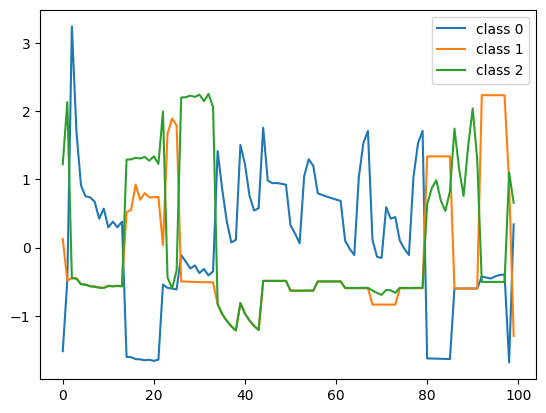

In [40]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
metricas_scoring = {
    "Accuracy": "accuracy",
    "Precision": "precision_weighted",
    "Recall": "recall_weighted",
    "F1-Score": "f1_weighted"
}

all_scores_cv = {nome_metrica: {} for nome_metrica in metricas_scoring.keys()}

In [46]:
y_train_lstm = y_train.copy()
y_test_lstm = y_test.copy()
x_train_lstm = x_train.copy()
x_test_lstm = x_test.copy()

In [47]:
x_train_lstm = x_train_lstm.reshape((x_train_lstm.shape[0], x_train_lstm.shape[1], 1))
x_test_lstm = x_test_lstm.reshape((x_test_lstm.shape[0], x_test_lstm.shape[1], 1))

In [48]:
num_classes = len(np.unique(y_train))
print(num_classes)

3


In [49]:
def make_model(input_shape, dropout_rate=0.5):
  input_layer = keras.layers.Input(input_shape)

  conv1 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(input_layer)
  conv1 = keras.layers.BatchNormalization()(conv1)
  conv1 = keras.layers.ReLU()(conv1)

  conv1 = keras.layers.Dropout(rate=dropout_rate)(conv1)

  conv2 = keras.layers.Conv1D(filters=256, kernel_size=3, padding="same")(conv1)
  conv2 = keras.layers.BatchNormalization()(conv2)
  conv2 = keras.layers.ReLU()(conv2)

  conv2 = keras.layers.Dropout(rate=dropout_rate)(conv2)

  conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
  conv3 = keras.layers.BatchNormalization()(conv3)
  conv3 = keras.layers.ReLU()(conv3)

  gap = keras.layers.GlobalAveragePooling1D()(conv3)

  gap = keras.layers.Dropout(rate=dropout_rate)(gap)

  output_layer = keras.layers.Dense(num_classes, activation="sigmoid")(gap)

  return keras.models.Model(inputs=input_layer, outputs=output_layer)


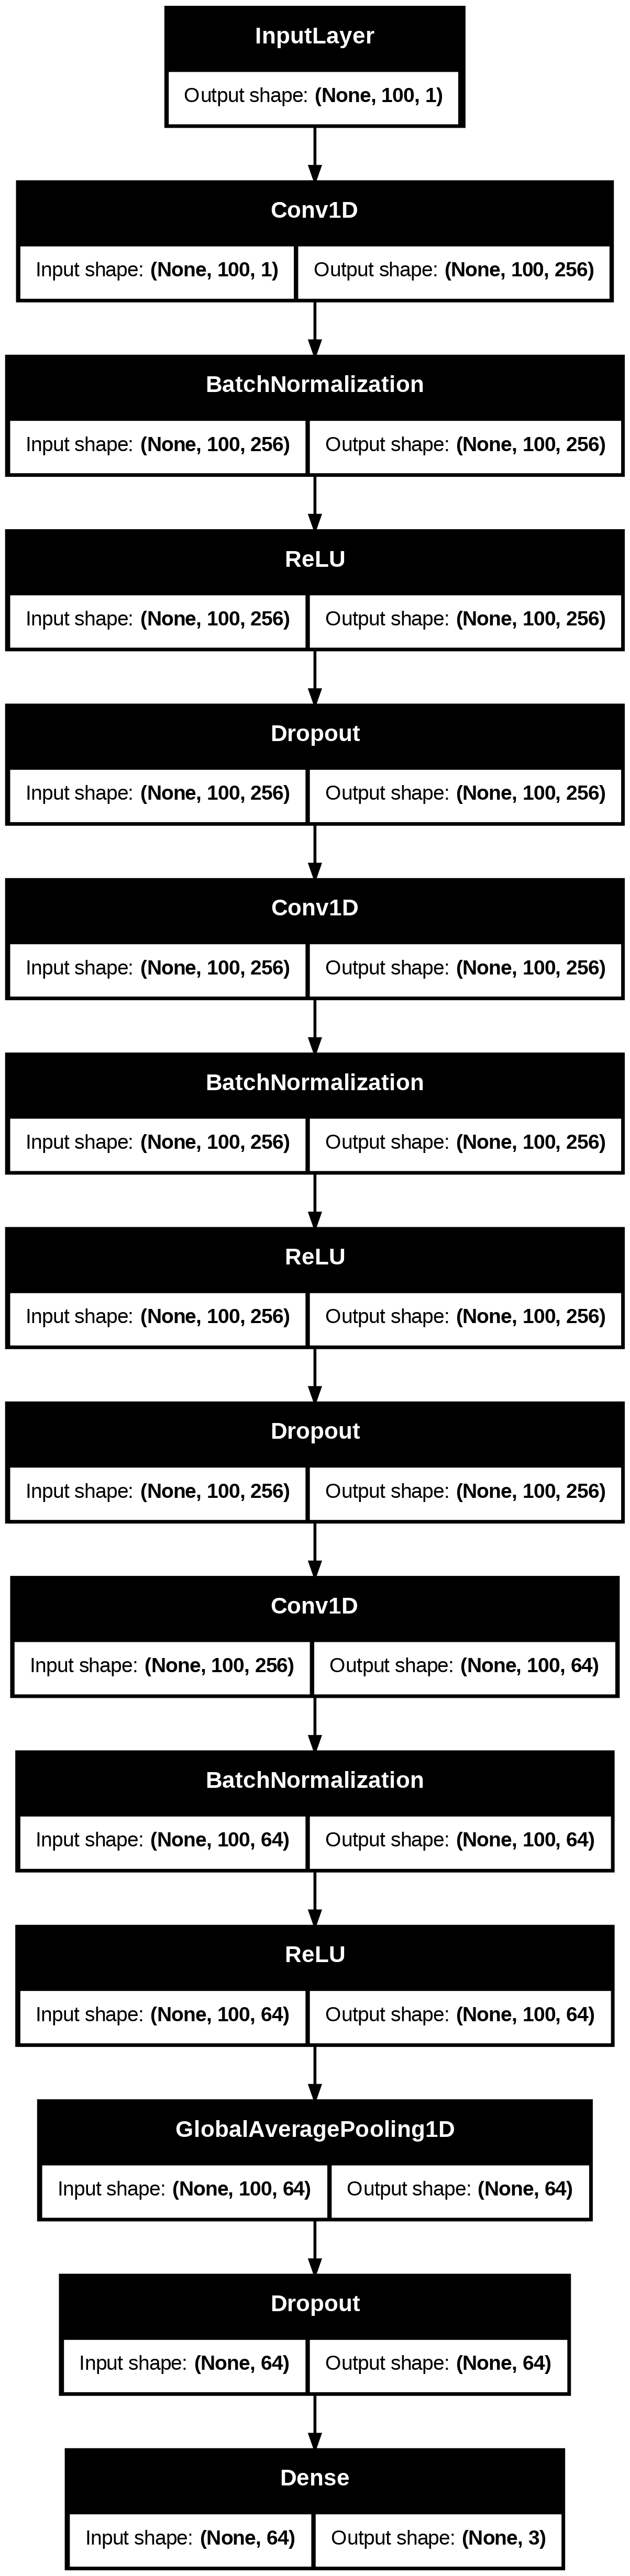

In [50]:
# model = make_model(input_shape=x_train.shape[1:], num_classes=num_classes)
model = make_model(input_shape=x_train_lstm.shape[1:])

keras.utils.plot_model(model, show_shapes=True)

In [51]:
n_folds = 10
epochs = 50
batch_size = 32

In [52]:
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Listas para armazenar as métricas de CADA fold
acc_per_fold = []
precision_per_fold = []
recall_per_fold = []
f1_per_fold = []
loss_per_fold = []

In [53]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=30, min_lr=0.0005
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", mode='min', patience=30, restore_best_weights=True, verbose=1),
]

In [54]:
# Se y_train tiver shape (13197,), faça o reshape:
if len(y_train_lstm.shape) == 1:
    y_train_lstm = np.expand_dims(y_train_lstm, axis=-1)

if len(y_test_lstm.shape) == 1:
    y_test_lstm = np.expand_dims(y_test_lstm, axis=-1)

print(f"Novo shape de y_train: {y_train_lstm.shape}")
# Resultado esperado: (13197, 1)

Novo shape de y_train: (13197, 1)


In [ ]:
fold_no = 1
for train_index, val_index in tqdm(kf.split(x_train_lstm, y_train_lstm)):
    print(f'----------------- Fold {fold_no}/{n_folds} -----------------')

    # Dividir os dados em conjuntos de treino e validação para o fold atual
    X_train_fold, X_val_fold = x_train_lstm[train_index], y_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    # Cria e Compila o Modelo
    # A cada fold, o modelo deve ser reinicializado para evitar vazamento de pesos
    model = make_model(input_shape=x_train_lstm.shape[1:])

    model.compile(
      optimizer='adam',
      loss="sparse_categorical_crossentropy",
      metrics=[
          SparseCategoricalAccuracy(name='accuracy'),
      ],
    )

    # Treinar o Modelo
    print('Treinando...')
    history = model.fit(
      x_train_lstm,
      y_train_lstm,
      batch_size=batch_size,
      epochs=epochs,
      callbacks=callbacks,
      validation_split=0.2,
      verbose=1,
    )

    # Avaliar o modelo no conjunto de validação
    print('Avaliando performance...')
    loss, accuracy_val = model.evaluate(X_val_fold, Y_val_fold, verbose=0)

    # Obter previsões para calcular as outras métricas
    y_pred_probs = model.predict(X_val_fold)
    y_pred_labels = np.argmax(y_pred_probs, axis=1)
    y_true_labels = np.squeeze(Y_val_fold)

    print(f'Loss: {loss:.4f}, Accuracy: {accuracy_val:.4f}')

    # Incrementar o número do fold
    fold_no += 1


0it [00:00, ?it/s]

----------------- Fold 1/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.7208 - loss: 0.6243 - val_accuracy: 0.3417 - val_loss: 3.7359 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9174 - loss: 0.2573 - val_accuracy: 0.9686 - val_loss: 0.1365 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9367 - loss: 0.1867 - val_accuracy: 0.9735 - val_loss: 0.0942 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9540 - loss: 0.1402 - val_accuracy: 0.9784 - val_loss: 0.0782 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9504 - loss: 0.1384 - val_accuracy: 0.9659 - val_loss: 0.0941 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9538 - loss: 0.1340 - val_accuracy: 0.9792 - val_loss: 0.0671 - learning_rate: 0.0010
Epoch 7/50
330/330 ━━━━━━━━

1it [01:10, 70.13s/it]

Loss: 52.0123, Accuracy: 0.3030
----------------- Fold 2/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7206 - loss: 0.6089 - val_accuracy: 0.3417 - val_loss: 2.9914 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9229 - loss: 0.2477 - val_accuracy: 0.9576 - val_loss: 0.1498 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9413 - loss: 0.1744 - val_accuracy: 0.9746 - val_loss: 0.0905 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9506 - loss: 0.1433 - val_accuracy: 0.9777 - val_loss: 0.0758 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9557 - loss: 0.1293 - val_accuracy: 0.9761 - val_loss: 0.0783 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9582 - loss: 0.1252 - val_accuracy: 0.9807 - val_loss: 0.0604 - learning_rate: 0.

2it [02:14, 66.99s/it]

Loss: 43.9348, Accuracy: 0.6742
----------------- Fold 3/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7183 - loss: 0.6170 - val_accuracy: 0.3417 - val_loss: 3.3197 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9123 - loss: 0.2631 - val_accuracy: 0.9462 - val_loss: 0.1641 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9377 - loss: 0.1874 - val_accuracy: 0.9689 - val_loss: 0.1043 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9480 - loss: 0.1515 - val_accuracy: 0.9670 - val_loss: 0.0959 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9521 - loss: 0.1340 - val_accuracy: 0.9553 - val_loss: 0.1163 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1187 - val_accuracy: 0.9792 - val_loss: 0.0608 - learning_rate: 0.

3it [03:19, 65.77s/it]

Loss: 58.4980, Accuracy: 0.3258
----------------- Fold 4/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7167 - loss: 0.6398 - val_accuracy: 0.3417 - val_loss: 3.8171 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9213 - loss: 0.2570 - val_accuracy: 0.9451 - val_loss: 0.1583 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9414 - loss: 0.1784 - val_accuracy: 0.9663 - val_loss: 0.1086 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9487 - loss: 0.1509 - val_accuracy: 0.9761 - val_loss: 0.0735 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9543 - loss: 0.1293 - val_accuracy: 0.9803 - val_loss: 0.0704 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9555 - loss: 0.1231 - val_accuracy: 0.9818 - val_loss: 0.0647 - learning_rate: 0.

4it [04:23, 65.32s/it]

Loss: 67.9401, Accuracy: 0.6614
----------------- Fold 5/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7058 - loss: 0.6247 - val_accuracy: 0.3417 - val_loss: 3.3353 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9184 - loss: 0.2413 - val_accuracy: 0.9784 - val_loss: 0.1193 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9398 - loss: 0.1792 - val_accuracy: 0.9712 - val_loss: 0.0875 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9426 - loss: 0.1594 - val_accuracy: 0.9758 - val_loss: 0.0725 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1353 - val_accuracy: 0.9576 - val_loss: 0.1058 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9573 - loss: 0.1204 - val_accuracy: 0.9811 - val_loss: 0.0643 - learning_rate: 0.

5it [05:28, 65.07s/it]

Loss: 50.0184, Accuracy: 0.3379
----------------- Fold 6/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7089 - loss: 0.6502 - val_accuracy: 0.3417 - val_loss: 4.2162 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2541 - val_accuracy: 0.9678 - val_loss: 0.1375 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9461 - loss: 0.1723 - val_accuracy: 0.9538 - val_loss: 0.1264 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9499 - loss: 0.1484 - val_accuracy: 0.9727 - val_loss: 0.0882 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9574 - loss: 0.1294 - val_accuracy: 0.9773 - val_loss: 0.0676 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9546 - loss: 0.1250 - val_accuracy: 0.9803 - val_loss: 0.0690 - learning_rate: 0.

6it [06:33, 65.08s/it]

Loss: 67.1146, Accuracy: 0.3288
----------------- Fold 7/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7304 - loss: 0.5998 - val_accuracy: 0.3417 - val_loss: 3.8285 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9200 - loss: 0.2478 - val_accuracy: 0.9652 - val_loss: 0.1398 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9343 - loss: 0.1839 - val_accuracy: 0.9735 - val_loss: 0.0872 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9509 - loss: 0.1481 - val_accuracy: 0.9648 - val_loss: 0.0995 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9531 - loss: 0.1378 - val_accuracy: 0.9746 - val_loss: 0.0719 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9563 - loss: 0.1219 - val_accuracy: 0.9735 - val_loss: 0.0772 - learning_rate: 0.

7it [07:39, 65.25s/it]

Loss: 78.4290, Accuracy: 0.0000
----------------- Fold 8/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.7127 - loss: 0.6109 - val_accuracy: 0.3417 - val_loss: 2.6462 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9161 - loss: 0.2544 - val_accuracy: 0.9667 - val_loss: 0.1319 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9395 - loss: 0.1773 - val_accuracy: 0.9648 - val_loss: 0.0982 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9439 - loss: 0.1503 - val_accuracy: 0.9640 - val_loss: 0.1067 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9556 - loss: 0.1265 - val_accuracy: 0.9652 - val_loss: 0.0888 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9586 - loss: 0.1170 - val_accuracy: 0.9795 - val_loss: 0.0677 - learning_rate: 0.

8it [08:46, 65.97s/it]

Loss: 63.1381, Accuracy: 0.3313
----------------- Fold 9/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7265 - loss: 0.6084 - val_accuracy: 0.3417 - val_loss: 3.4992 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9219 - loss: 0.2462 - val_accuracy: 0.9723 - val_loss: 0.1172 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9419 - loss: 0.1750 - val_accuracy: 0.9780 - val_loss: 0.0916 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9524 - loss: 0.1419 - val_accuracy: 0.9735 - val_loss: 0.0814 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9545 - loss: 0.1316 - val_accuracy: 0.9712 - val_loss: 0.0823 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9615 - loss: 0.1107 - val_accuracy: 0.9731 - val_loss: 0.0743 - learning_rate: 0.

9it [09:52, 65.89s/it]

Loss: 80.8338, Accuracy: 0.3556
----------------- Fold 10/10 -----------------
Treinando...
Epoch 1/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7236 - loss: 0.6066 - val_accuracy: 0.3417 - val_loss: 2.3798 - learning_rate: 0.0010
Epoch 2/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9232 - loss: 0.2413 - val_accuracy: 0.9754 - val_loss: 0.1101 - learning_rate: 0.0010
Epoch 3/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9431 - loss: 0.1731 - val_accuracy: 0.9773 - val_loss: 0.0866 - learning_rate: 0.0010
Epoch 4/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9565 - loss: 0.1408 - val_accuracy: 0.9723 - val_loss: 0.0918 - learning_rate: 0.0010
Epoch 5/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9541 - loss: 0.1272 - val_accuracy: 0.9697 - val_loss: 0.0832 - learning_rate: 0.0010
Epoch 6/50
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9598 - loss: 0.1215 - val_accuracy: 0.9814 - val_loss: 0.0657 - learning_rate: 0

10it [10:58, 65.81s/it]

Loss: 46.0834, Accuracy: 0.6801


In [57]:
modelLSTM = keras.models.load_model("best_model.keras")

test_loss, test_acc = model.evaluate(x_test_lstm, y_test_lstm)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9955 - loss: 0.0208
Test accuracy 0.9954545497894287
Test loss 0.01921374537050724


In [ ]:

# Obtendo as previsões 
y_pred_probs = modelLSTM.predict(x_test_lstm)

# Convertendo probabilidades para a classe prevista (labels 0, 1 ou 2)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Certificando de que y_test também está no formato 
y_true_labels = np.squeeze(y_test_lstm)

# Gera relatório completo de métricas
report = classification_report(
    y_true_labels,
    y_pred_labels,
    target_names=['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)'],
    digits=4,
    zero_division=0 # Para evitar avisos se não houver previsão para uma classe
)

print("\n--- Relatório de Classificação Completo ---")
print(report)

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

--- Relatório de Classificação Completo ---
                      precision    recall  f1-score   support

          Benign (0)     0.9944    1.0000    0.9972      1068
   DoS-Slowloris (1)     0.9973    0.9920    0.9947      1126
DoS-SlowHTTPTest (2)     0.9973    0.9973    0.9973      1106

            accuracy                         0.9964      3300
           macro avg     0.9963    0.9964    0.9964      3300
        weighted avg     0.9964    0.9964    0.9964      3300



Scores de CV do LSTM coletados e salvos em 'all_scores_cv_teste'.


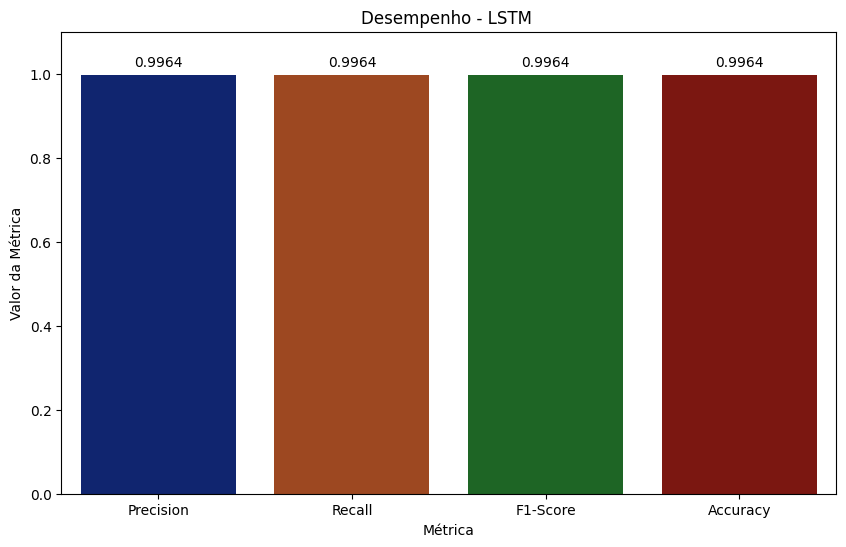

In [ ]:
precision = precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
recall = recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true_labels, y_pred_labels)

lstm_scores_temp = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1-Score': f1}
for nome_metrica in metricas_scoring.keys():
    # lista para acumular scores por fold
    scores_lstm = np.array(lstm_scores_temp[nome_metrica])

    # SALVAR NO DICIONÁRIO FINAL
    all_scores_cv[nome_metrica]['LSTM'] = scores_lstm

print(f"Scores de CV do {'LSTM'} coletados e salvos em 'all_scores_cv_teste'.")

# Cria o DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}
df_metricas = pd.DataFrame(metricas)
df_metrics_lstm = df_metricas.copy()
df_metrics_lstm = df_metrics_lstm.insert(loc=0, column='Modelo', value='LSTM')
# Plota o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.4f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha = 'center', va = 'center',
               xytext = (0, 9),
               textcoords = 'offset points')

plt.title('Desempenho - LSTM ')
plt.ylim(0, 1.1)
plt.ylabel('Valor da Métrica')
plt.show()

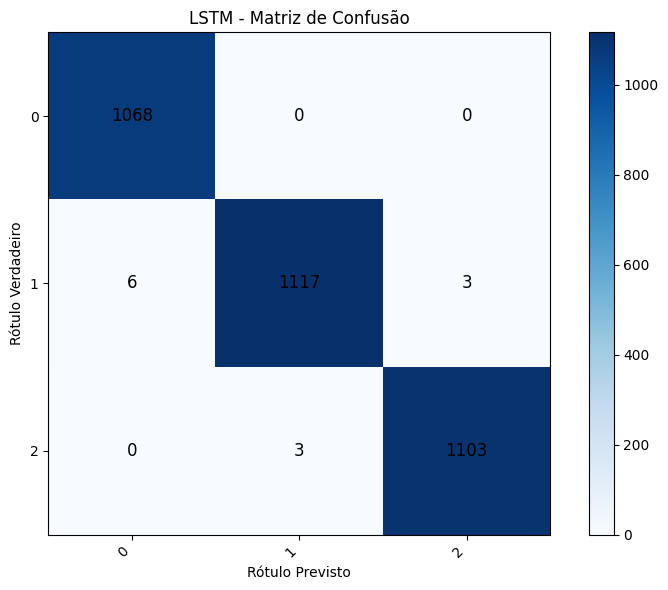

In [ ]:

# Convertendo probabilidades para rótulos de classe (inteiros)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Garantindo que os rótulos reais (y_true) estejam no formato 1D para sklearn
y_true_labels = np.squeeze(y_test_lstm)

# Calcula a Matriz de confusão com labels inteiros
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Plota a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]),
                 ha='center', va='center',
                 color='black', fontsize=12) 

plt.title('LSTM - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Rótulo Verdadeiro')
plt.xlabel('Rótulo Previsto')

# legendas 
plt.xticks(ticks=np.arange(len(classes)), labels=classes, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(classes)), labels=classes)

plt.tight_layout() 
plt.show()

104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


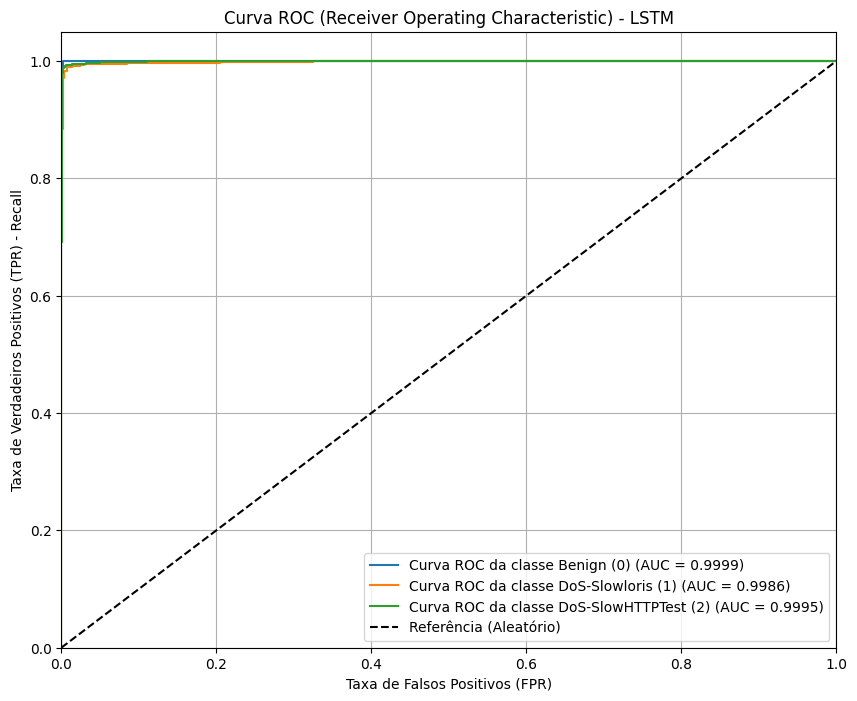

In [ ]:
# define as classes (0, 1, 2)
class_names = [0, 1, 2]
n_classes = len(class_names)

# legendas do gráfico
legend_names = ['Benign (0)', 'DoS-Slowloris (1)', 'DoS-SlowHTTPTest (2)']

# Obtem as probabilidades do modelo Keras
y_pred_prob = model.predict(x_test_lstm) 

# Binarizar os rótulos 
# comando para garantir que y_test esteja no formato 1D
y_true_labels = np.squeeze(y_test_lstm)
y_test_bin = label_binarize(y_true_labels, classes=class_names)


fpr = dict()
tpr = dict()
roc_auc = dict()

# Curva ROC e a área AUC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {legend_names[i]} (AUC = {roc_auc[i]:.4f})'
    )

plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR) - Recall')
plt.title('Curva ROC (Receiver Operating Characteristic) - LSTM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [ ]:
# MLP com os hiperparâmetros configurados

modelMLP = MLPClassifier(hidden_layer_sizes=(256,),
                        max_iter = 1000,activation = 'tanh',
                        solver = 'adam',
                        learning_rate_init = 0.05, early_stopping = True,
                        verbose=True)


In [66]:
modelMLP.fit(x_train, y_train)

Iteration 1, loss = 0.17749954
Validation score: 0.983333
Iteration 2, loss = 0.03825208
Validation score: 0.989394
Iteration 3, loss = 0.03249954
Validation score: 0.980303
Iteration 4, loss = 0.02246242
Validation score: 0.988636
Iteration 5, loss = 0.01453692
Validation score: 0.996970
Iteration 6, loss = 0.01984189
Validation score: 0.993939
Iteration 7, loss = 0.01259635
Validation score: 0.984091
Iteration 8, loss = 0.01046165
Validation score: 0.989394
Iteration 9, loss = 0.00659335
Validation score: 0.994697
Iteration 10, loss = 0.00315642
Validation score: 0.996970
Iteration 11, loss = 0.00242779
Validation score: 0.999242
Iteration 12, loss = 0.00282249
Validation score: 1.000000
Iteration 13, loss = 0.00592072
Validation score: 0.996970
Iteration 14, loss = 0.02088254
Validation score: 0.955303
Iteration 15, loss = 0.05985563
Validation score: 0.994697
Iteration 16, loss = 0.06583939
Validation score: 0.981818
Iteration 17, loss = 0.04390429
Validation score: 0.992424
Iterat

MLPClassifier(activation='tanh', early_stopping=True, hidden_layer_sizes=(256,),
              learning_rate_init=0.05, max_iter=1000, verbose=True)

In [67]:
previsoes_algoritmos = {}

In [68]:
previsoes_algoritmos['LSTM'] = y_pred_labels

In [70]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:

nome_modelo = "MLP"
X_dados = x 
Y_dados = y 

# Para cada métrica, calcule o cross_val_score e salve
for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(modelMLP, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=1, n_jobs=-1)

    # salva no dicionario final
    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Scores de CV do MLP coletados e salvos em 'all_scores_cv_teste'.


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    4.3s finished


In [73]:
# Realizando predições
predictsMLP = modelMLP.predict(x_test)

accuracyMLP = accuracy_score(y_test, predictsMLP)
print(f'Precisão do modelo de MLP: {accuracyMLP}')

reportMLP = classification_report(y_test, predictsMLP, digits=4)
print(f'\nRelatório de Classificação:\n{reportMLP}')

Precisão do modelo de MLP: 0.9981818181818182

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9981    1.0000    0.9991      1068
           1     0.9973    0.9991    0.9982      1126
           2     0.9991    0.9955    0.9973      1106

    accuracy                         0.9982      3300
   macro avg     0.9982    0.9982    0.9982      3300
weighted avg     0.9982    0.9982    0.9982      3300



In [74]:
print(f'Scores validação cruzada MLP: {scores}')
print(f'Média dos scores: {scores.mean()}')
print(f'Desvio padrão dos scores: {scores.std()}')

Scores validação cruzada MLP: [0.99636139 0.99636358 0.9957574  0.9969708  1.         0.99696745
 0.99939394 0.99939357 0.9915038  0.99393231]
Média dos scores: 0.9966644235271804
Desvio padrão dos scores: 0.0024761221923456462


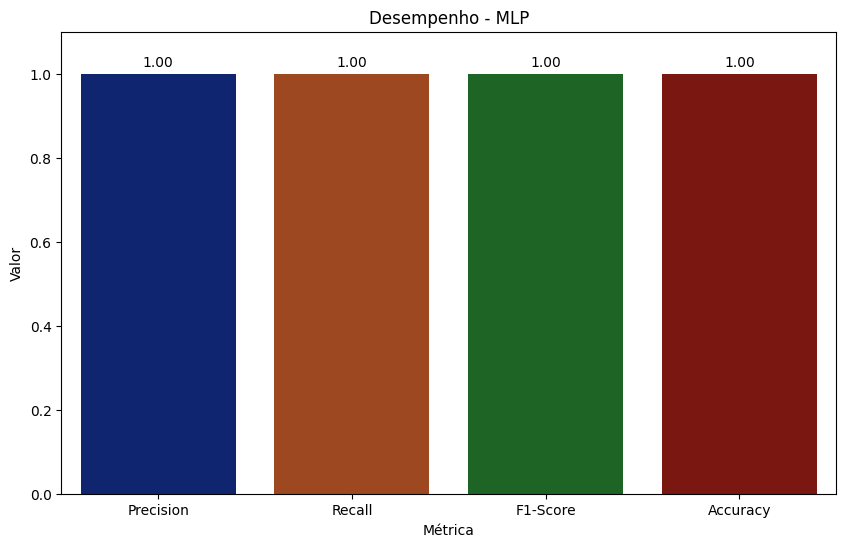

In [75]:
# Calcular as métricas
y_pred = predictsMLP
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_mlp = df_metricas.copy()
df_metrics_mlp.insert(loc=0, column='Modelo', value='MLP')
# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - MLP')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

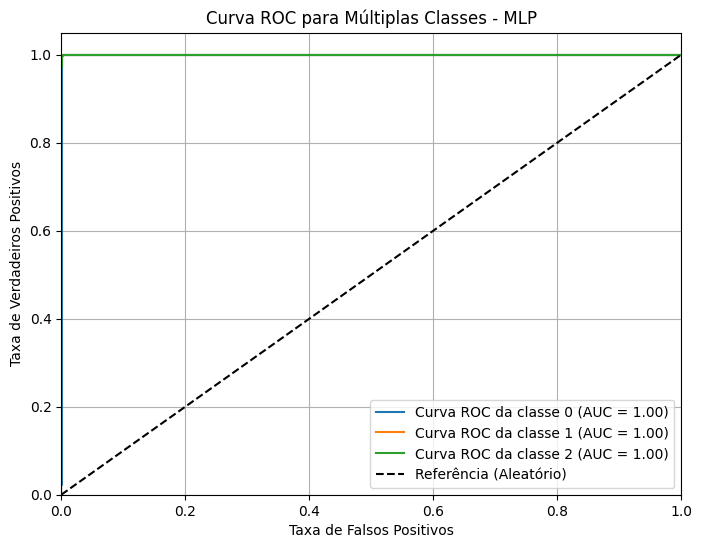

In [ ]:
class_names = modelMLP.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Curva ROC e a area AUC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência 
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - MLP')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [80]:
previsoes_algoritmos['MLP'] = y_pred

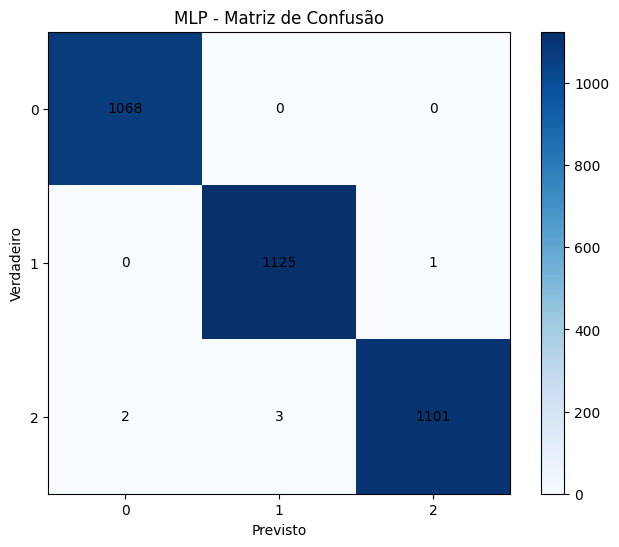

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores das células
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('MLP - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:

# Criar e treinar o classificador NB
nb = GaussianNB()

nb.fit(x_train, y_train)

nome_modelo = "Naive Bayes"
X_dados = x 
Y_dados = y 

# validacao cruzada
for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(nb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    # salva no dicionario final
    all_scores_cv[nome_metrica][nome_modelo] = scores

print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

scores_nb = scores



Scores de CV do Naive Bayes coletados e salvos em 'all_scores_cv_teste'.


In [84]:
print(f'Scores validação cruzada MLP: {scores_nb}')
print(f'Média dos scores: {scores_nb.mean()}')
print(f'Desvio padrão dos scores: {scores_nb.std()}')

Scores validação cruzada MLP: [0.94063849 0.9370803  0.93916434 0.94289719 0.94232994 0.94292894
 0.93313271 0.92988703 0.93800354 0.9349041 ]
Média dos scores: 0.9380966597851932
Desvio padrão dos scores: 0.0041855755713277685


In [85]:
# Prever os rótulos para os dados de teste
predictsNB = nb.predict(x_test)

accuracyNB = accuracy_score(y_test, predictsNB)
print(f'Precisão do modelo de NB: {accuracyNB}')

reportNB = classification_report(y_test, predictsNB, digits=4)
print(f'\nRelatório de Classificação:\n{reportNB}')

Precisão do modelo de NB: 0.943030303030303

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9753    1.0000    0.9875      1068
           1     0.9846    0.8544    0.9149      1126
           2     0.8811    0.9783    0.9272      1106

    accuracy                         0.9430      3300
   macro avg     0.9470    0.9442    0.9432      3300
weighted avg     0.9469    0.9430    0.9425      3300



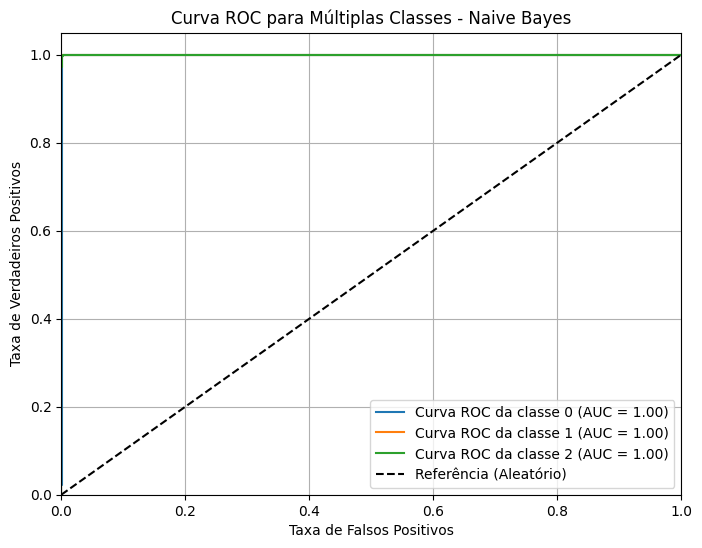

In [ ]:
class_names = nb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Curva ROC e a area AUC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# curvas ROC no mesmo gráfico
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Naive Bayes')
plt.legend(loc="lower right")
plt.grid()
plt.show()

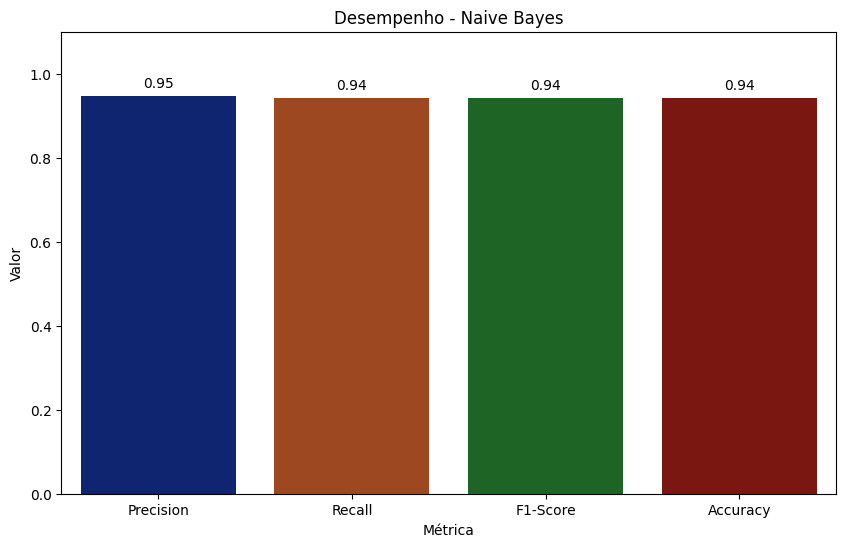

In [87]:
# Calcular as métricas
y_pred = predictsNB
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_nb = df_metricas.copy()
df_metrics_nb.insert(loc=0, column='Modelo', value='Naive Bayes')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Naive Bayes')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

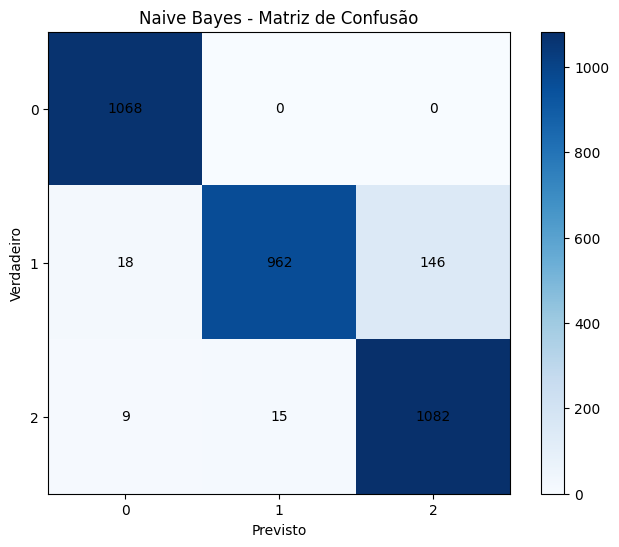

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores das celulas
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Naive Bayes - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [89]:
previsoes_algoritmos['Naive Bayes'] = y_pred

In [ ]:

# Modelagem e escolha dos hiperparâmetros do algoritmo de Decision Tree
modelDT = DecisionTreeClassifier(
  criterion='entropy',
  max_depth=10,
  min_samples_split=2,
  min_samples_leaf=1,
  max_features=None
)

# Treinando o modelo
modelDT.fit(x_train, y_train)
# scores_DT = cross_val_score(modelDT, x, y, cv=skf, verbose=1, n_jobs=-1)

nome_modelo = "Decision Tree"
X_dados = x # Seu conjunto de dados de features
Y_dados = y # Seu conjunto de rótulos

# Para cada métrica, calcule o cross_val_score e salve
for nome_metrica, scorer in metricas_scoring.items():
    # Calcula os 10 scores de CV para a métrica atual
    # CORREÇÃO: Usar o 'scorer' e o 'skf' definido globalmente
    scores = cross_val_score(modelDT, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    # SALVAR NO DICIONÁRIO FINAL
    all_scores_cv[nome_metrica][nome_modelo] = scores

scores_DT = scores
print(f"Scores de CV do {nome_modelo} coletados e salvos em 'all_scores_cv_teste'.")

print(f'Scores validação cruzada MLP: {scores_DT}')
print(f'Média dos scores: {scores_DT.mean()}')
print(f'Desvio padrão dos scores: {scores_DT.std()}')


Scores de CV do Decision Tree coletados e salvos em 'all_scores_cv_teste'.
Scores validação cruzada MLP: [0.99878788 0.99878787 1.         0.99939394 0.99939394 0.99939394
 0.99878787 0.99818071 0.99939357 0.99939357]
Média dos scores: 0.9991513300322821
Desvio padrão dos scores: 0.0004850334752211808


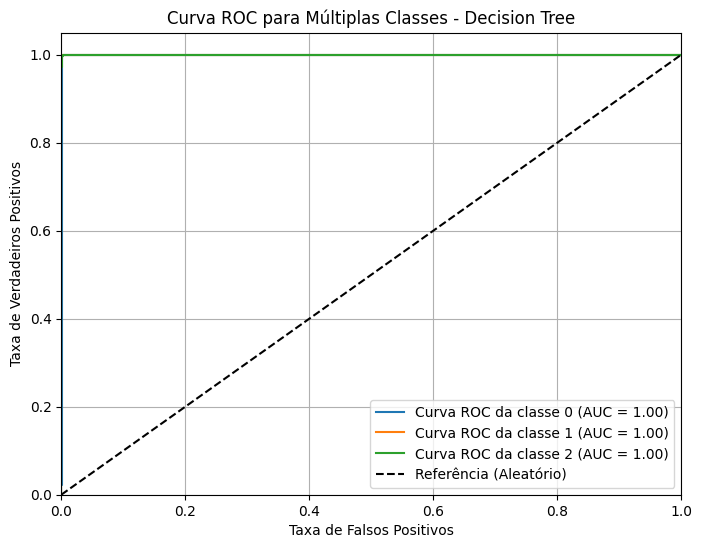

In [ ]:
class_names = modelDT.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Curva ROC e a area AUC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# curvas ROC no mesmo gráfico
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [93]:
# Realizando predições
predictsDT = modelDT.predict(x_test)

accuracyDT = accuracy_score(y_test, predictsDT)
print(f'Precisão do modelo de Árvore de Decisão: {accuracyDT}')

reportDT = classification_report(y_test, predictsDT, digits=4)
print(f'\nRelatório de Classificação:\n{reportDT}')

Precisão do modelo de Árvore de Decisão: 0.9996969696969698

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9991    1.0000    0.9995      1068
           1     1.0000    0.9991    0.9996      1126
           2     1.0000    1.0000    1.0000      1106

    accuracy                         0.9997      3300
   macro avg     0.9997    0.9997    0.9997      3300
weighted avg     0.9997    0.9997    0.9997      3300



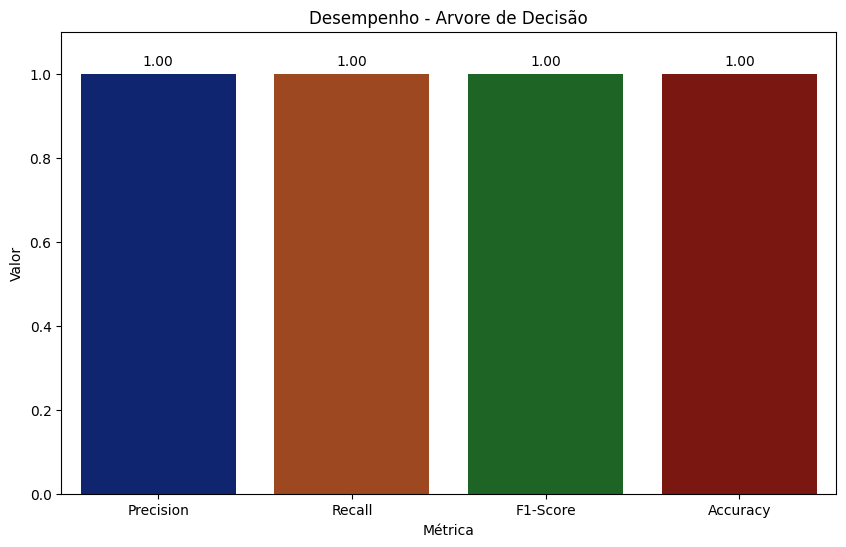

In [ ]:
# Calcular as métricas
y_pred = predictsDT
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_dt = df_metricas.copy()
df_metrics_dt.insert(loc=0, column='Modelo', value='Arvore de Decisão')

# gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Arvore de Decisão')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [95]:
previsoes_algoritmos['Arvore de Decisão'] = y_pred

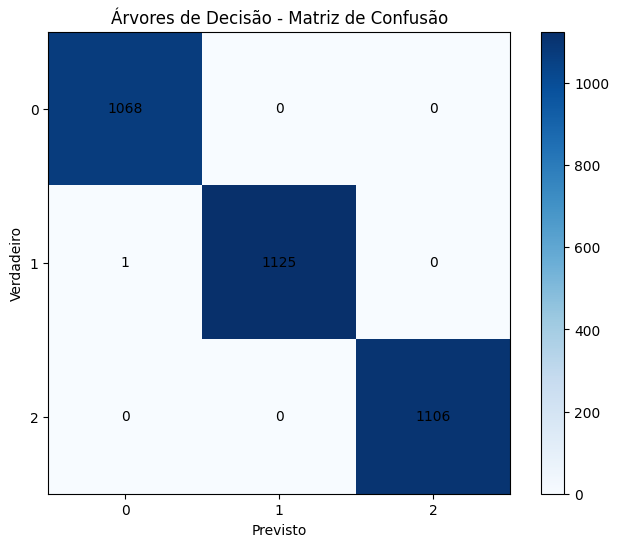

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores das celulas
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Árvores de Decisão - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
# Modelagem dos hiperparâmetros Random FOrest
modelRF = RandomForestClassifier(
  n_estimators=100,
  criterion='entropy',
  min_samples_split=2,
  min_samples_leaf=1,
  random_state=42
)

# Treinando o modelo
modelRF.fit(x_train, y_train)

nome_modelo = "Random Forest"
X_dados = x 
Y_dados = y 

# validacao cruzada
for nome_metrica, scorer in metricas_scoring.items():

    scores = cross_val_score(modelRF, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    # SALVAR NO DICIONÁRIO FINAL
    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_RF = scores
print(f'Scores validação cruzada MLP: {scores_RF}')
print(f'Média dos scores: {scores_RF.mean()}')
print(f'Desvio padrão dos scores: {scores_RF.std()}')



Scores validação cruzada MLP: [0.99939394 1.         1.         0.99939394 1.         1.
 1.         1.         1.         1.        ]
Média dos scores: 0.9998787877786125
Desvio padrão dos scores: 0.0002424244427750022


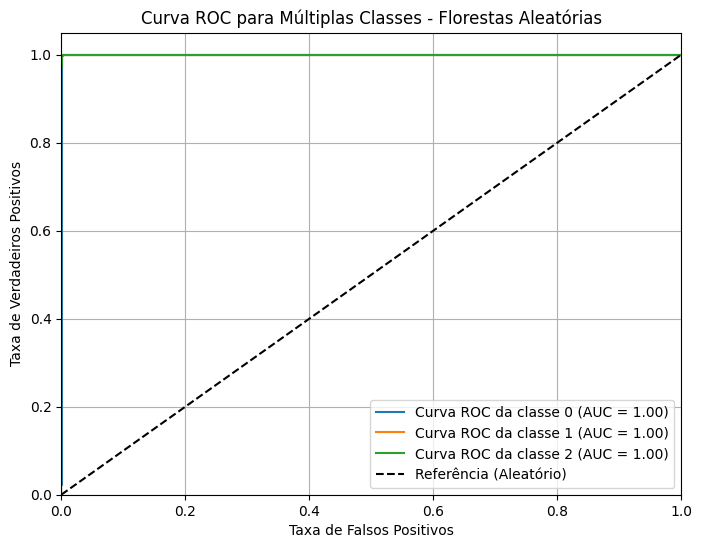

In [ ]:
class_names = modelRF.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# Curva ROC e a area AUC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# curvas ROC no mesmo gráfico
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Florestas Aleatórias')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [100]:
# Realizando predições
predictsRF = modelRF.predict(x_test)

accuracyRF = accuracy_score(y_test, predictsRF)
print(f'Precisão do modelo de Floresta Aleatória: {accuracyRF}')

reportRF = classification_report(y_test, predictsRF, digits=4)
print(f'\nRelatório de Classificação:\n{reportRF}')

Precisão do modelo de Floresta Aleatória: 0.9993939393939394

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9991    1.0000    0.9995      1068
           1     1.0000    0.9982    0.9991      1126
           2     0.9991    1.0000    0.9995      1106

    accuracy                         0.9994      3300
   macro avg     0.9994    0.9994    0.9994      3300
weighted avg     0.9994    0.9994    0.9994      3300



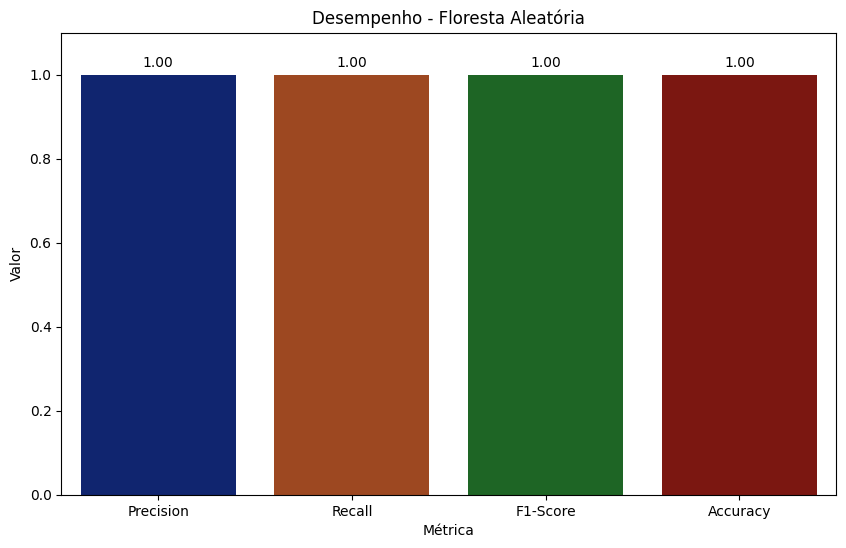

In [ ]:
# Calcular as métricas
y_pred = predictsRF
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_rf = df_metricas.copy()
df_metrics_rf.insert(loc=0, column='Modelo', value='Floresta Aleatória')

# gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - Floresta Aleatória')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [102]:
previsoes_algoritmos['Floresta Aleatória'] = y_pred

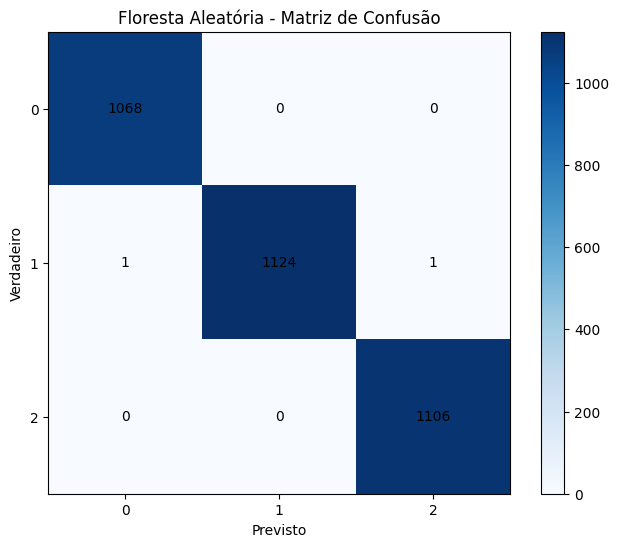

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
# matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores das celulas
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('Floresta Aleatória - Matriz de Confusão')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:

# Criar e treinar o classificador SVM
svm = SVC(kernel='rbf', probability=True, random_state=42, verbose=True)

svm.fit(x_train, y_train)

nome_modelo = "SVM"
X_dados = x 
Y_dados = y 

# validacao cruzada
for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(svm, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    # SALVAR NO DICIONÁRIO FINAL
    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_SVM = scores



[LibSVM]

In [105]:
print(f'Scores validação cruzada SVM: {scores_SVM}')
print(f'Média dos scores: {scores_SVM.mean()}')
print(f'Desvio padrão dos scores: {scores_SVM.std()}')

Scores validação cruzada SVM: [0.98969356 0.99151168 0.98847602 0.99515039 0.9951515  0.98968564
 0.98847988 0.98725506 0.98664968 0.99150613]
Média dos scores: 0.9903559551984585
Desvio padrão dos scores: 0.002827301307583878


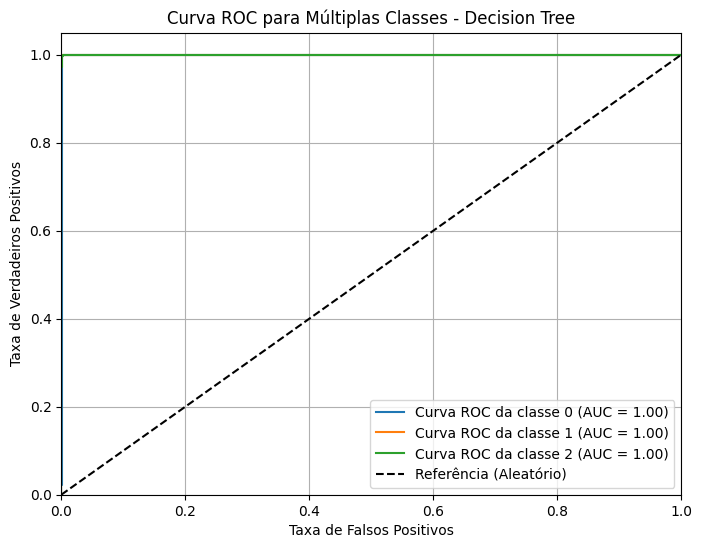

In [ ]:
class_names = svm.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# curva ROC e a area AUC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# curvas ROC no mesmo gráfico
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - Decision Tree')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [107]:
# Prever os rótulos para os dados de teste
predictsSVM = svm.predict(x_test)

accuracySVM = accuracy_score(y_test, predictsSVM)
print(f'Precisão do modelo de SVM: {accuracySVM}')

reportSVM = classification_report(y_test, predictsSVM, digits=4)
print(f'\nRelatório de Classificação:\n{reportSVM}')

Precisão do modelo de SVM: 0.9884848484848485

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9963    1.0000    0.9981      1068
           1     0.9848    0.9813    0.9831      1126
           2     0.9846    0.9846    0.9846      1106

    accuracy                         0.9885      3300
   macro avg     0.9886    0.9887    0.9886      3300
weighted avg     0.9885    0.9885    0.9885      3300



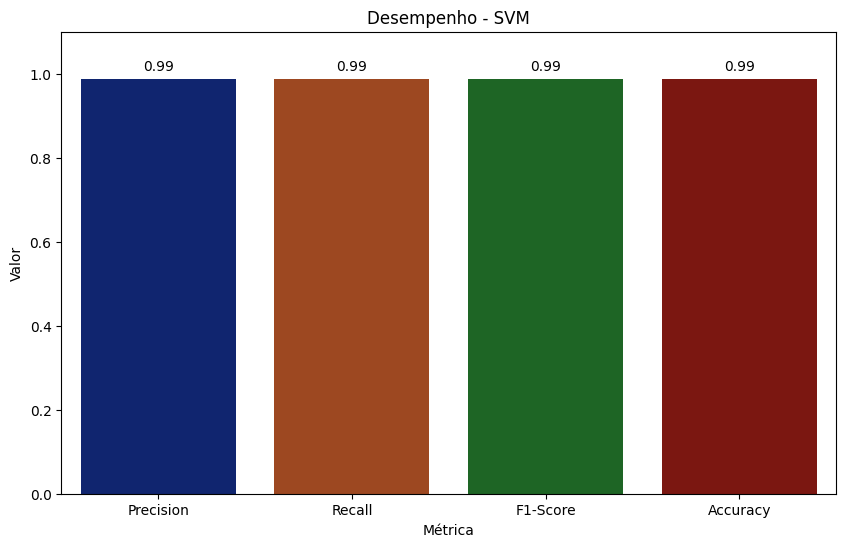

In [108]:
# Calcular as métricas
y_pred = predictsSVM
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_svm = df_metricas.copy()
df_metrics_svm.insert(loc=0, column='Modelo', value='SVM')

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - SVM')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [109]:
previsoes_algoritmos['SVM'] = y_pred

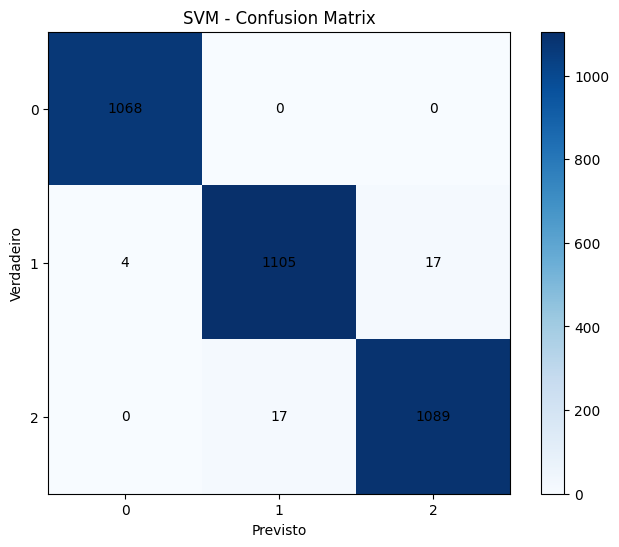

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
# matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores das celulas
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('SVM - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [ ]:
# AdaBoost Algoritmo
from sklearn.ensemble import AdaBoostClassifier

#Treina o algoritimo
adb = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
adb.fit(x_train, y_train)

nome_modelo = "AdaBoost"
X_dados = x # Seu conjunto de dados de features
Y_dados = y # Seu conjunto de rótulos

# validacao cruzada
for nome_metrica, scorer in metricas_scoring.items():
    scores = cross_val_score(adb, X_dados, Y_dados, cv=skf, scoring=scorer, verbose=0, n_jobs=-1)

    # SALVAR NO DICIONÁRIO FINAL
    all_scores_cv[nome_metrica][nome_modelo] = scores
scores_adb = scores


print(f'Scores validação cruzada adaBoost: {scores_adb}')
print(f'Média dos scores: {scores_adb.mean()}')
print(f'Desvio padrão dos scores: {scores_adb.std()}')

Scores validação cruzada adaBoost: [0.99575698 0.99090703 0.99696963 0.99878788 0.99878788 0.99636361
 0.99213159 0.99575768 0.99757539 0.99696783]
Média dos scores: 0.9960005504176379
Desvio padrão dos scores: 0.0024709557365021804


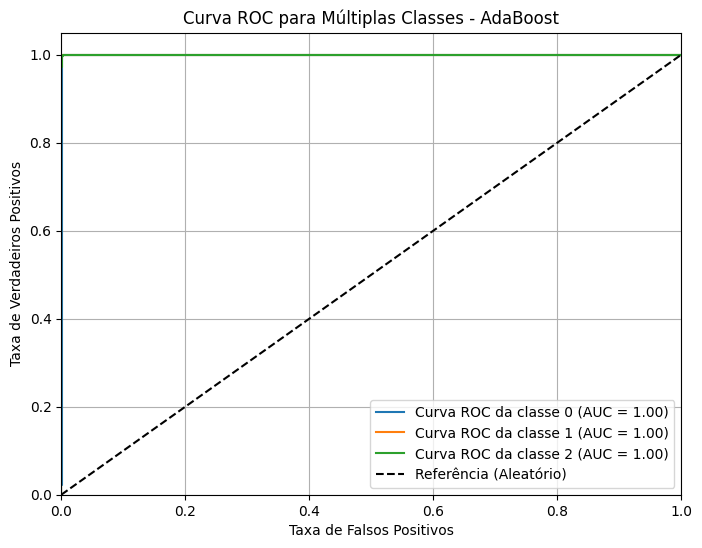

In [112]:
class_names = adb.classes_
y_test_bin = label_binarize(y_test, classes=class_names)
n_classes = y_test_bin.shape[1]
y_pred_prob = modelMLP.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

# 3. Calcule a Curva ROC e a área AUC para cada classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 4. Plote todas as curvas ROC no mesmo gráfico
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(
        fpr[i],
        tpr[i],
        label=f'Curva ROC da classe {class_names[i]} (AUC = {roc_auc[i]:.2f})'
    )

# Linha de referência (classificador aleatório)
plt.plot([0, 1], [0, 1], 'k--', label='Referência (Aleatório)')

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC para Múltiplas Classes - AdaBoost')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
predictions_adb = adb.predict(x_test)
print(classification_report(y_test, predictions_adb))

accuracyadb = accuracy_score(y_test, predictions_adb)
print(f'Precisão do modelo de AdaBoost: {accuracyadb}')

reportadb = classification_report(y_test, predictions_adb, digits=4)
print(f'\nRelatório de Classificação:\n{reportadb}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1068
           1       1.00      1.00      1.00      1126
           2       1.00      1.00      1.00      1106

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300

Precisão do modelo de AdaBoost: 0.9981818181818182

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9991    1.0000    0.9995      1068
           1     0.9982    0.9964    0.9973      1126
           2     0.9973    0.9982    0.9977      1106

    accuracy                         0.9982      3300
   macro avg     0.9982    0.9982    0.9982      3300
weighted avg     0.9982    0.9982    0.9982      3300



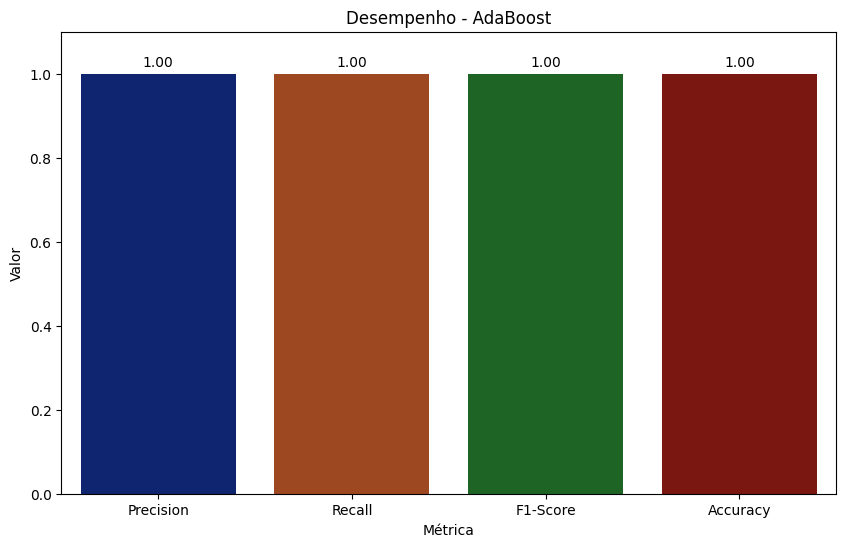

In [ ]:
# Calcular as métricas
y_pred = predictions_adb
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
accuracy = accuracy_score(y_test, y_pred)

# Criar um DataFrame com as métricas
metricas = {
    'Métrica': ['Precision', 'Recall', 'F1-Score', 'Accuracy'],
    'Valor': [precision, recall, f1, accuracy]
}

df_metricas = pd.DataFrame(metricas)
df_metrics_adb = df_metricas.copy()
df_metrics_adb.insert(loc=0, column='Modelo', value='AdaBoost')

# gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Métrica', y='Valor', data=df_metricas, hue='Métrica', palette='dark', dodge=False, legend=False)

# Adicionar anotações
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),  # Distância do texto em relação à barra
                textcoords = 'offset points')

plt.title('Desempenho - AdaBoost')
plt.ylim(0, 1.1)
plt.ylabel('Valor')
plt.show()

In [115]:
previsoes_algoritmos['AdaBoost'] = y_pred

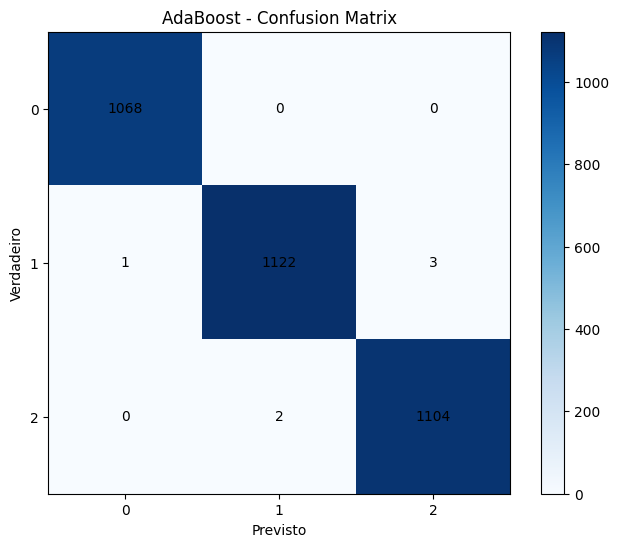

In [116]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plotar a matriz de confusão com legenda
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')

# Adicionar os valores de cada célula da matriz de confusão com legenda
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.title('AdaBoost - Confusion Matrix')
plt.colorbar()
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')

# Adicionar legenda
plt.xticks(ticks=np.arange(len(classes)), labels=classes)
plt.yticks(ticks=np.arange(len(classes)), labels=classes)
plt.show()

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [118]:
def create_dataset(data, look_back=1):
   X, y = [], []
   for i in range(len(data)-look_back-1):
       a = data[i:(i+look_back), 0]
       X.append(a)
       y.append(data[i + look_back, 0])
   return np.array(X), np.array(y)


look_back = 10
X, y = create_dataset(x, look_back)

In [119]:
X_gru = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [120]:
# Construir modelo GRU
model_gru_ts = Sequential()
model_gru_ts.add(GRU( 50 , return_sequences= True , input_shape=(look_back, 1 )))
model_gru_ts.add(GRU( 50 ))
model_gru_ts.add(Dense( 1 ))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [121]:
model_gru_ts.compile(optimizer='adam', loss='mean_squared_error')

In [122]:
model_gru_ts.fit(X_gru, y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2549
Epoch 2/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2005
Epoch 3/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1998
Epoch 4/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1960
Epoch 5/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1938
Epoch 6/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1920
Epoch 7/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1916
Epoch 8/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1935
Epoch 9/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1939
Epoch 10/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1857
Epoch 11/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2020
Epoch 12/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1907
Epoch 13/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1884
Epoch 14/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1882
Epoch 15/100
516/516 ━━━━━━━━━━━━━━━━━━━━ 3

In [123]:
scaler_ts = StandardScaler()
scaler_ts.fit(x[:, 0].reshape(-1, 1))# x_scaled = scaler_ts.transform(x)

StandardScaler()

In [ ]:
predictions = model_gru_ts.predict(X)
predictions = scaler_ts.inverse_transform(predictions)
y_actual = scaler_ts.inverse_transform([y])

516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tqdm import tqdm

# modelo GRU

def make_gru_model(input_shape, num_classes, dropout_rate=0.5):

    model = Sequential()

    model.add(GRU(units=128,
                  input_shape=input_shape,
                  return_sequences=False,
                  implementation=2)) # return_sequences=False na última GRU

    model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(num_classes, activation='softmax'))

    return model

# validacao cruzada GRU

model_gru_name = "GRU"
n_folds = 10

# Dicionário temporário para armazenar scores do GRU por métrica
gru_scores_temp = {nome_metrica: [] for nome_metrica in metricas_scoring.keys()}
input_shape = x_train_lstm.shape[1:]

for fold_no, (train_index, val_index) in enumerate(tqdm(kf.split(x_train_lstm, y_train_lstm), total=n_folds, desc=f"Folds do {model_gru_name}")):

    X_train_fold, X_val_fold = x_train_lstm[train_index], x_train_lstm[val_index]
    Y_train_fold, Y_val_fold = y_train_lstm[train_index], y_train_lstm[val_index]

    # Criar novo modelo
    model_gru = make_gru_model(input_shape, num_classes)
    model_gru.compile(
        optimizer='adam',
        loss="sparse_categorical_crossentropy",
        metrics=['accuracy'],
    )

    # treinar o modelo
    model_gru.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=32, verbose=1)

    # previsões
    y_pred_probs = model_gru.predict(X_val_fold, verbose=0)
    y_pred_labels = np.argmax(y_pred_probs, axis=1) 
    y_true_labels = np.squeeze(Y_val_fold) 
    
    gru_scores_temp['Accuracy'].append(accuracy_score(y_true_labels, y_pred_labels))
    gru_scores_temp['Precision'].append(precision_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['Recall'].append(recall_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))
    gru_scores_temp['F1-Score'].append(f1_score(y_true_labels, y_pred_labels, average='weighted', zero_division=0))


for nome_metrica in metricas_scoring.keys():
    all_scores_cv[nome_metrica][model_gru_name] = np.array(gru_scores_temp[nome_metrica])

print("\nValidação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.")

# Treinamento para modelo final
modelGRU_final = make_gru_model(input_shape, num_classes)
modelGRU_final.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

print("\nTreinando modelo GRU final...")
modelGRU_final.fit(x_train_lstm, y_train_lstm, epochs=50, batch_size=32, callbacks=callbacks, validation_split=0.2, verbose=0)

# conjunto de teste
test_loss_gru, test_acc_gru = modelGRU_final.evaluate(x_test_lstm, y_test_lstm, verbose=0)
print(f"Acurácia final do GRU no teste: {test_acc_gru:.4f}")

# salva modelo
modelGRU_final.save('best_model_gru.keras')
modelGRU = modelGRU_final # Atribuindo o modelo final a uma variável padrão

# Geração de previsões para plotagem
y_pred_probs_gru = modelGRU.predict(x_test_lstm)
y_pred_gru = np.argmax(y_pred_probs_gru, axis=1)
previsoes_algoritmos['GRU'] = y_pred_gru

print("Modelo GRU final treinado e salvo como 'modelGRU'.")



---------------------------------------------
INICIANDO VALIDAÇÃO CRUZADA MANUAL PARA GRU
---------------------------------------------


Folds do GRU:   0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8108 - loss: 0.4684
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9702 - loss: 0.0958
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9727 - loss: 0.0826
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9843 - loss: 0.0578
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9841 - loss: 0.0581
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9838 - loss: 0.0570
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9766 - loss: 0.0714
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9849 - loss: 0.0501
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9881 - loss: 0.0384
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9865 - loss: 0.0391
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9885 - loss: 0.0377
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

Folds do GRU:  10%|█         | 1/10 [02:06<18:54, 126.09s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8191 - loss: 0.4687
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9682 - loss: 0.0924
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9788 - loss: 0.0680
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9777 - loss: 0.0684
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9829 - loss: 0.0592
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9810 - loss: 0.0596
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9868 - loss: 0.0433
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9836 - loss: 0.0471
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9878 - loss: 0.0418
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9888 - loss: 0.0412
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9907 - loss: 0.0268
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy

Folds do GRU:  20%|██        | 2/10 [04:11<16:45, 125.67s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8240 - loss: 0.4719
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9682 - loss: 0.1033
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9742 - loss: 0.0798
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9816 - loss: 0.0592
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9842 - loss: 0.0543
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9843 - loss: 0.0489
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9871 - loss: 0.0442
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9901 - loss: 0.0313
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9881 - loss: 0.0396
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9881 - loss: 0.0403
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9869 - loss: 0.0409
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

Folds do GRU:  30%|███       | 3/10 [06:17<14:39, 125.67s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8252 - loss: 0.4704
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9588 - loss: 0.1282
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9698 - loss: 0.0861
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9786 - loss: 0.0750
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9830 - loss: 0.0598
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9854 - loss: 0.0508
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9874 - loss: 0.0444
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9873 - loss: 0.0431
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9866 - loss: 0.0391
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9928 - loss: 0.0291
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9922 - loss: 0.0326
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

Folds do GRU:  40%|████      | 4/10 [08:22<12:33, 125.61s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8294 - loss: 0.4700
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9698 - loss: 0.0995
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9763 - loss: 0.0731
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9785 - loss: 0.0664
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9846 - loss: 0.0498
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9817 - loss: 0.0531
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9875 - loss: 0.0445
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9867 - loss: 0.0433
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9879 - loss: 0.0405
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9896 - loss: 0.0316
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9916 - loss: 0.0273
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

Folds do GRU:  50%|█████     | 5/10 [10:27<10:27, 125.51s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8199 - loss: 0.4818
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9630 - loss: 0.1095
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9739 - loss: 0.0784
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9728 - loss: 0.0850
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9841 - loss: 0.0564
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9816 - loss: 0.0617
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9834 - loss: 0.0514
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9860 - loss: 0.0435
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9868 - loss: 0.0446
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9813 - loss: 0.0549
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9891 - loss: 0.0362
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy

Folds do GRU:  60%|██████    | 6/10 [12:35<08:24, 126.19s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8408 - loss: 0.4458
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9675 - loss: 0.0963
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9670 - loss: 0.1062
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9822 - loss: 0.0581
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9829 - loss: 0.0504
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9847 - loss: 0.0528
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9858 - loss: 0.0477
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9882 - loss: 0.0395
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9876 - loss: 0.0384
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9885 - loss: 0.0407
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9913 - loss: 0.0263
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

Folds do GRU:  70%|███████   | 7/10 [14:41<06:18, 126.15s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8171 - loss: 0.4802
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9664 - loss: 0.1051
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9761 - loss: 0.0776
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9809 - loss: 0.0640
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9796 - loss: 0.0629
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9841 - loss: 0.0529
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9854 - loss: 0.0443
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9879 - loss: 0.0381
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9872 - loss: 0.0399
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9886 - loss: 0.0349
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9868 - loss: 0.0358
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

Folds do GRU:  80%|████████  | 8/10 [16:46<04:11, 125.85s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8037 - loss: 0.4943
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9692 - loss: 0.0992
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9769 - loss: 0.0660
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9781 - loss: 0.0694
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9868 - loss: 0.0437
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9867 - loss: 0.0449
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9869 - loss: 0.0416
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9905 - loss: 0.0375
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9891 - loss: 0.0376
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9913 - loss: 0.0319
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9913 - loss: 0.0303
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy

Folds do GRU:  90%|█████████ | 9/10 [18:51<02:05, 125.62s/it]

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


372/372 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8206 - loss: 0.4717
Epoch 2/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9663 - loss: 0.1015
Epoch 3/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9767 - loss: 0.0743
Epoch 4/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9800 - loss: 0.0662
Epoch 5/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9833 - loss: 0.0537
Epoch 6/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9865 - loss: 0.0441
Epoch 7/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9838 - loss: 0.0472
Epoch 8/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9897 - loss: 0.0335
Epoch 9/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9904 - loss: 0.0336
Epoch 10/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9902 - loss: 0.0303
Epoch 11/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9860 - loss: 0.0452
Epoch 12/50
372/372 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy

Folds do GRU: 100%|██████████| 10/10 [20:57<00:00, 125.78s/it]
/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Validação Cruzada GRU concluída e scores salvos em 'all_scores_cv'.

Treinando modelo GRU final...
Restoring model weights from the end of the best epoch: 46.
Acurácia final do GRU no teste: 0.9994
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Modelo GRU final treinado e salvo como 'modelGRU'.


In [126]:
dt_test = pd.DataFrame(all_scores_cv)
dt_test.tail()

Accuracy  \
Decision Tree  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
SVM            [0.9896969696969697, 0.9915151515151515, 0.988...   
AdaBoost       [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU            [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                       Precision  \
Decision Tree  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Random Forest  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   
SVM            [0.9897043081127256, 0.9915388727824097, 0.988...   
AdaBoost       [0.9957706749385861, 0.9909671363719603, 0.996...   
GRU            [0.996969696969697, 0.9992441738400168, 0.9992...   

                                                          Recall  \
Decision Tree  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
SVM            [0.9896969696969697, 0.9915151515151515, 0.988...   
AdaBoost       [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU            [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                        F1-Score  
Decision Tree  [0.9987878782870019, 0.9987878747808532, 1.0, ...  
Random Forest  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...  
SVM            [0.9896935611026145, 0.9915116790525484, 0.988...  
AdaBoost       [0.9957569846786611, 0.9909070288215633, 0.996...  
GRU            [0.996969696969697, 0.9992424481716625, 0.9992...

In [130]:
previsoes_df = pd.DataFrame(previsoes_algoritmos)
previsoes_df.tail()

LSTM  MLP  Naive Bayes  Arvore de Decisão  Floresta Aleatória  SVM  \
3295     0    0            0                  0                   0    0   
3296     0    0            0                  0                   0    0   
3297     0    0            0                  0                   0    0   
3298     1    1            1                  1                   1    1   
3299     2    2            2                  2                   2    2   

      AdaBoost  GRU  
3295         0    0  
3296         0    0  
3297         0    0  
3298         1    1  
3299         2    2

In [133]:
all_metrics_algorithm = pd.concat([df_metrics_lstm,df_metrics_mlp,df_metrics_dt, df_metrics_rf, df_metrics_svm, df_metrics_adb])
all_metrics_algorithm.head()

Modelo    Métrica     Valor
0                MLP  Precision  0.998183
1                MLP     Recall  0.998182
2                MLP   F1-Score  0.998181
3                MLP   Accuracy  0.998182
0  Arvore de Decisão  Precision  0.999697

In [134]:
data_metrics = all_metrics_algorithm.reset_index(drop=True)

In [ ]:
data_metrics.to_csv('/poseiddon/GROUP A/CONFIGURATION 1/metricas_algoritmos.csv')
previsoes_df.to_csv('/poseiddon/GROUP A/CONFIGURATION 1/previsoes_algoritmos.csv')

In [ ]:
teste = pd.read_csv('/poseiddon/GROUP A/CONFIGURATION 1/metricas_algoritmos.csv', index_col=0)
teste.head()

Modelo    Métrica     Valor
0                MLP  Precision  0.998183
1                MLP     Recall  0.998182
2                MLP   F1-Score  0.998181
3                MLP   Accuracy  0.998182
4  Arvore de Decisão  Precision  0.999697

In [ ]:
teste2 = pd.read_csv('/poseiddon/GROUP A/CONFIGURATION 1/previsoes_algoritmos.csv', index_col=0)
teste2.head()

LSTM  MLP  Naive Bayes  Arvore de Decisão  Floresta Aleatória  SVM  \
0     2    2            2                  2                   2    2   
1     1    1            1                  1                   1    1   
2     2    2            2                  2                   2    2   
3     0    0            0                  0                   0    0   
4     2    2            2                  2                   2    2   

   AdaBoost  GRU  
0         2    2  
1         1    1  
2         2    2  
3         0    0  
4         2    2

In [ ]:

modelos = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    # "AdaBoost": adb,
    "LSTM": modelLSTM,
    "GRU": model_gru
}

scores_f1_por_algoritmo = {
    "MLP": modelMLP,
    "SVM": svm,
    "Árvores de Decisão": predictsDT,
    "Florestas Aleatórias": predictsRF,
    # "AdaBoost": adb,
    "LSTM": modelLSTM,
    "GRU": model_gru#
}

In [141]:
data_score = pd.DataFrame(all_scores_cv)
data_score.head()

Accuracy  \
LSTM                                          0.9963636363636363   
MLP            [1.0, 0.9993939393939394, 0.9987878787878788, ...   
Naive Bayes    [0.9412121212121212, 0.9381818181818182, 0.94,...   
Decision Tree  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   

                                                       Precision  \
LSTM                                          0.9963689236740912   
MLP            [0.9969839483037581, 0.9957673671833762, 0.995...   
Naive Bayes    [0.945960808346787, 0.9430394736790874, 0.9440...   
Decision Tree  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Random Forest  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   

                                                          Recall  \
LSTM                                          0.9963636363636363   
MLP            [0.9981818181818182, 0.9975757575757576, 0.995...   
Naive Bayes    [0.9412121212121212, 0.9381818181818182, 0.94,...   
Decision Tree  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   

                                                        F1-Score  
LSTM                                          0.9963613257170431  
MLP            [0.9963613924070923, 0.9963635808200191, 0.995...  
Naive Bayes    [0.9406384901598578, 0.9370803045597373, 0.939...  
Decision Tree  [0.9987878782870019, 0.9987878747808532, 1.0, ...  
Random Forest  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...

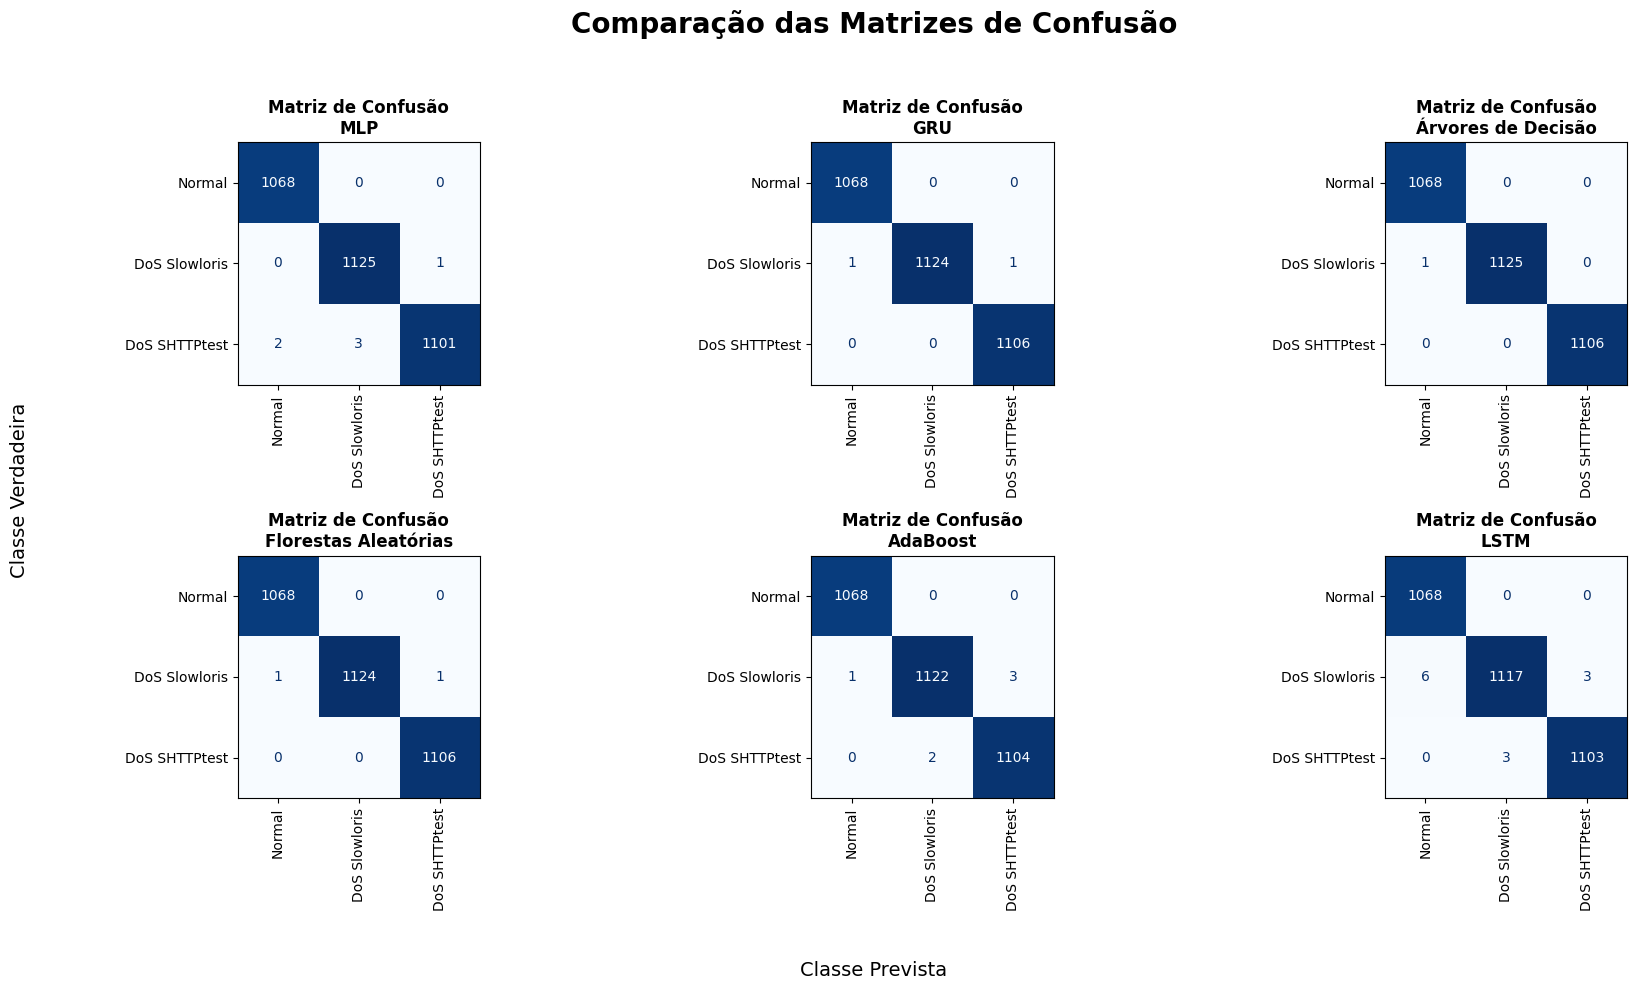

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

modelos = {
    "MLP": modelMLP,
    "GRU": modelGRU, 
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM
}

nomes_classes = ['Normal', 'DoS Slowloris', 'DoS SHTTPtest']

x_test_sklearn = x_test 
x_test_lstm = x_test_lstm 

predicoes = {}

# predições dos modelos
for nome, modelo in modelos.items():
    if nome in ["LSTM", "GRU"]:
        y_pred_probs = modelo.predict(x_test_lstm, verbose=0)

        # Convertendo probabilidades em rótulos de classe (0, 1, 2, ...)
        predicoes[nome] = np.argmax(y_pred_probs, axis=1)

    else:
        # predicoes
        predicoes[nome] = modelo.predict(x_test_sklearn)

# Cria a figura e o grid de subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

y_true_labels_1d = np.squeeze(y_test_lstm)


for ax, (nome_modelo, modelo) in zip(axes.ravel(), modelos.items()):

    # rótulos de classe para a Matriz de Confusão
    if hasattr(modelo, 'classes_'):
        model_classes = modelo.classes_
    else: 
        model_classes = np.arange(len(nomes_classes))

    cm = confusion_matrix(y_true_labels_1d, predicoes[nome_modelo], labels=model_classes)

    # Plota a matriz de confusão
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nomes_classes)
    disp.plot(ax=ax, cmap='Blues', colorbar=False, xticks_rotation='vertical')

    # Configurações do Subplot
    ax.set_title(f"Matriz de Confusão\n{nome_modelo}", fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')

# --- PASSO 3: Finalização ---

fig.supxlabel('Classe Prevista', fontsize=14)
fig.supylabel('Classe Verdadeira', fontsize=14)
fig.suptitle("Comparação das Matrizes de Confusão", fontsize=20, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

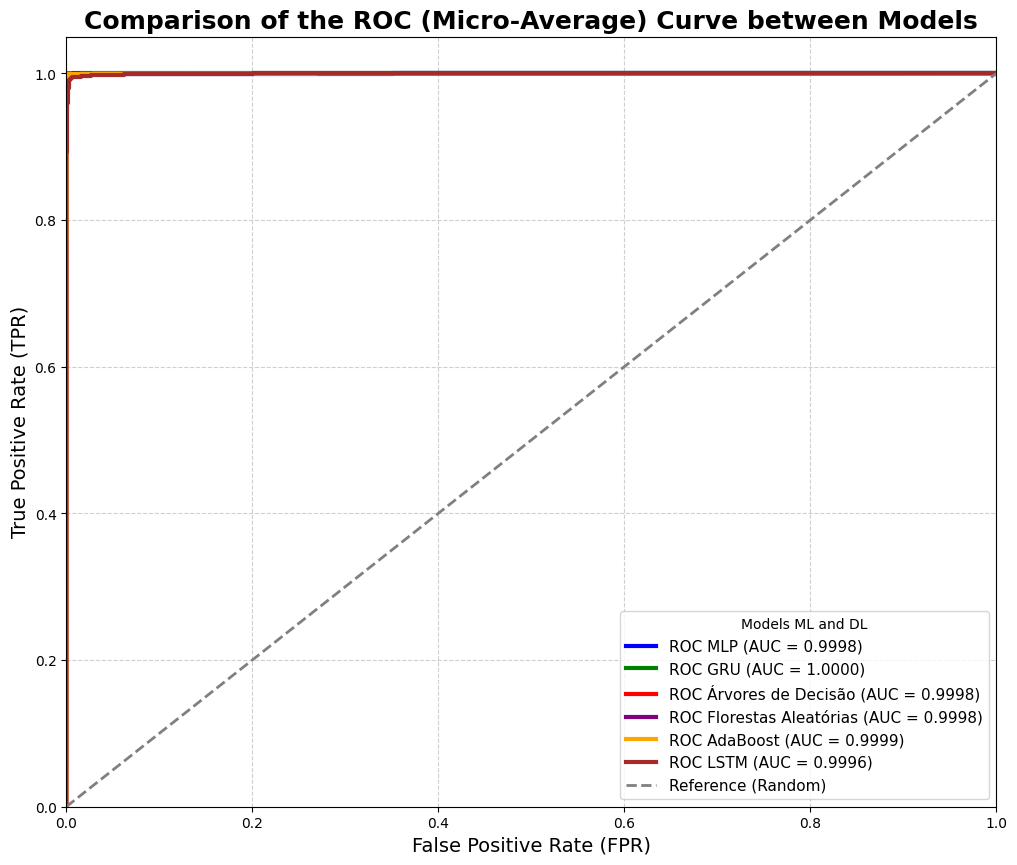

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import logging

# Configuração de logs
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')


# Dicionário com modelos
modelos = {
    "MLP": modelMLP,
    "GRU": model_gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}
x_test_sklearn = x_test
x_test_lstm = x_test_lstm
y_test_reais = y_test

# Binariza os labels de teste para o cálculo do ROC AUC
class_names = np.unique(y_test_reais)
y_test_bin = label_binarize(y_test_reais, classes=class_names)

# Prepara a figura para o plot
plt.figure(figsize=(12, 10))

# Lista de cores para diferenciar as linhas
cores = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

for i, (nome_modelo, modelo) in enumerate(modelos.items()):

    y_pred_prob = None

    if nome_modelo in ["LSTM", "GRU"]:
        y_pred_prob = modelo.predict(x_test_lstm, verbose=0)
    elif hasattr(modelo, 'predict_proba'):
        y_pred_prob = modelo.predict_proba(x_test_sklearn)
    else:
        logging.warning(f"O modelo {nome_modelo} foi ignorado por não possuir método de probabilidades.")
        continue

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    plt.plot(
        fpr,
        tpr,
        color=cores[i % len(cores)], 
        lw=3, # espessura da linha
        label=f'ROC {nome_modelo} (AUC = {roc_auc:.4f})' # Detalhe do AUC
    )

# Linha de Referência (Classificador Aleatório)
plt.plot(
    [0, 1],
    [0, 1],
    color='gray',
    lw=2,
    linestyle='--',
    label='Reference (Random)'
)

# Configurações do gráfico
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Eixos e Título
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.title('Comparison of the ROC (Micro-Average) Curve between Models', fontsize=18, fontweight='bold')

# Legenda
plt.legend(loc="lower right", fontsize=11, title="Models ML and DL")

# Grid
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [ ]:
# Lista de algoritmos que você deseja remover
algoritmos_a_remover = ['Naive Bayes', 'SVM']


In [146]:
df = pd.DataFrame(all_scores_cv)
df.tail()

Accuracy  \
Decision Tree  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
SVM            [0.9896969696969697, 0.9915151515151515, 0.988...   
AdaBoost       [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU            [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                       Precision  \
Decision Tree  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Random Forest  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   
SVM            [0.9897043081127256, 0.9915388727824097, 0.988...   
AdaBoost       [0.9957706749385861, 0.9909671363719603, 0.996...   
GRU            [0.996969696969697, 0.9992441738400168, 0.9992...   

                                                          Recall  \
Decision Tree  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
SVM            [0.9896969696969697, 0.9915151515151515, 0.988...   
AdaBoost       [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU            [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                        F1-Score  
Decision Tree  [0.9987878782870019, 0.9987878747808532, 1.0, ...  
Random Forest  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...  
SVM            [0.9896935611026145, 0.9915116790525484, 0.988...  
AdaBoost       [0.9957569846786611, 0.9909070288215633, 0.996...  
GRU            [0.996969696969697, 0.9992424481716625, 0.9992...

In [147]:
# Remove os algoritmos usando o índice
df_filtrado = df.drop(algoritmos_a_remover)
df.head()

Accuracy  \
LSTM                                          0.9963636363636363   
MLP            [1.0, 0.9993939393939394, 0.9987878787878788, ...   
Naive Bayes    [0.9412121212121212, 0.9381818181818182, 0.94,...   
Decision Tree  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   

                                                       Precision  \
LSTM                                          0.9963689236740912   
MLP            [0.9969839483037581, 0.9957673671833762, 0.995...   
Naive Bayes    [0.945960808346787, 0.9430394736790874, 0.9440...   
Decision Tree  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Random Forest  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   

                                                          Recall  \
LSTM                                          0.9963636363636363   
MLP            [0.9981818181818182, 0.9975757575757576, 0.995...   
Naive Bayes    [0.9412121212121212, 0.9381818181818182, 0.94,...   
Decision Tree  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   

                                                        F1-Score  
LSTM                                          0.9963613257170431  
MLP            [0.9963613924070923, 0.9963635808200191, 0.995...  
Naive Bayes    [0.9406384901598578, 0.9370803045597373, 0.939...  
Decision Tree  [0.9987878782870019, 0.9987878747808532, 1.0, ...  
Random Forest  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...

In [148]:
df_filtrado.tail(10)

Accuracy  \
LSTM                                          0.9963636363636363   
MLP            [1.0, 0.9993939393939394, 0.9987878787878788, ...   
Decision Tree  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
AdaBoost       [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU            [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                       Precision  \
LSTM                                          0.9963689236740912   
MLP            [0.9969839483037581, 0.9957673671833762, 0.995...   
Decision Tree  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Random Forest  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   
AdaBoost       [0.9957706749385861, 0.9909671363719603, 0.996...   
GRU            [0.996969696969697, 0.9992441738400168, 0.9992...   

                                                          Recall  \
LSTM                                          0.9963636363636363   
MLP            [0.9981818181818182, 0.9975757575757576, 0.995...   
Decision Tree  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
AdaBoost       [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU            [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                        F1-Score  
LSTM                                          0.9963613257170431  
MLP            [0.9963613924070923, 0.9963635808200191, 0.995...  
Decision Tree  [0.9987878782870019, 0.9987878747808532, 1.0, ...  
Random Forest  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...  
AdaBoost       [0.9957569846786611, 0.9909070288215633, 0.996...  
GRU            [0.996969696969697, 0.9992424481716625, 0.9992...

In [ ]:
all_scores_cv_array = df_filtrado.reset_index().to_numpy()
print("Array NumPy gerado com sucesso.")


Array NumPy gerado com sucesso.


/tmp/ipython-input-2173084894.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-2173084894.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-2173084894.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-2173084894.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

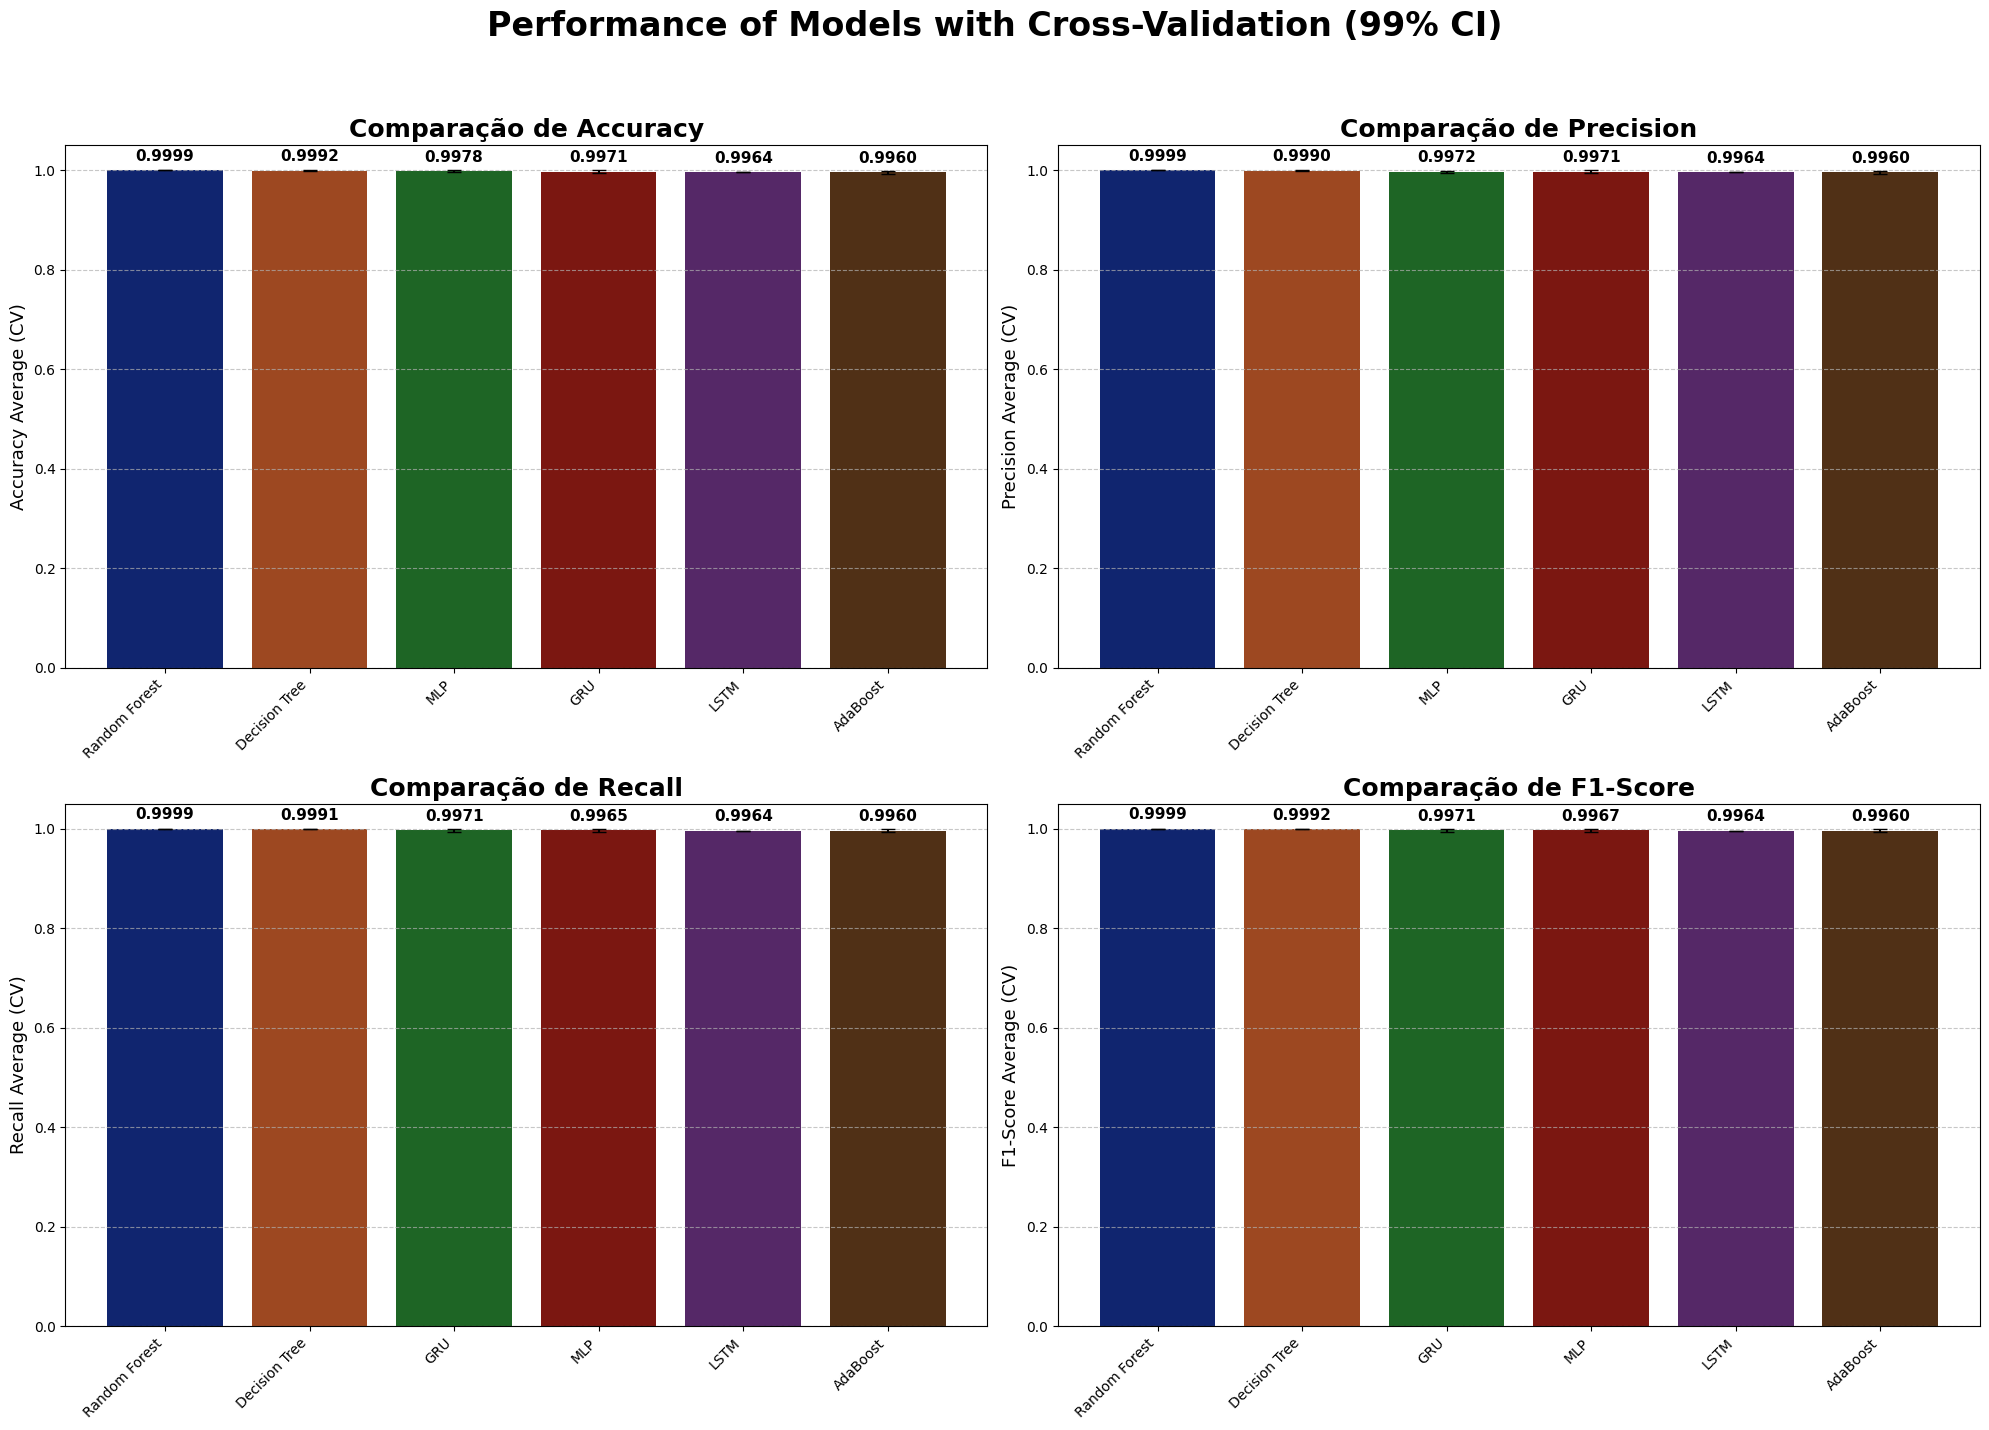

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import sem, t # sem: Standard Error of the Mean (Erro Padrão da Média)

def calcular_ic_95(dados):
    dados = np.array(dados)

    # Se houver menos de 2 scores o cálculo do IC é inválido.
    if dados.size < 2:
        return 0

    return t.ppf(0.995, dados.size - 1) * sem(dados)


# métricas plotar
metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]
scores_globais = df_filtrado.to_dict() # Converte para o dicionário esperado

plt.figure(figsize=(20, 15))

# subplot para cada métrica
for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) # Cria o i-ésimo subplot
    scores_da_metrica_atual = scores_globais[metrica]
    dados_plot = []

    for nome_modelo, scores in scores_da_metrica_atual.items():

        scores = np.array(scores)
        if scores.size == 0:
             continue

        media = np.mean(scores)
        ic = calcular_ic_95(scores) 

        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    if not dados_plot:
        plt.title(f"Dados indisponíveis para {metrica}", fontsize=16)
        continue

    # Cria o DataFrame para o plot
    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    # Cria o gráfico de barras
    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5, lw=1.5)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10),
                    textcoords='offset points', fontsize=11, fontweight='bold')


    # Configurações de cada subplot
    plt.title(f"Comparação de {metrica}", fontsize=18, fontweight='bold')
    plt.ylim(0, 1.05) # Ajusta o limite superior para melhor visualização de 0 a 1
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average (CV)", fontsize=13)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# título geral para a figura inteira
plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=24, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta o layout para o super-título caber
plt.show()

/tmp/ipython-input-2075955311.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-2075955311.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-2075955311.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")
/tmp/ipython-input-2075955311.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and w

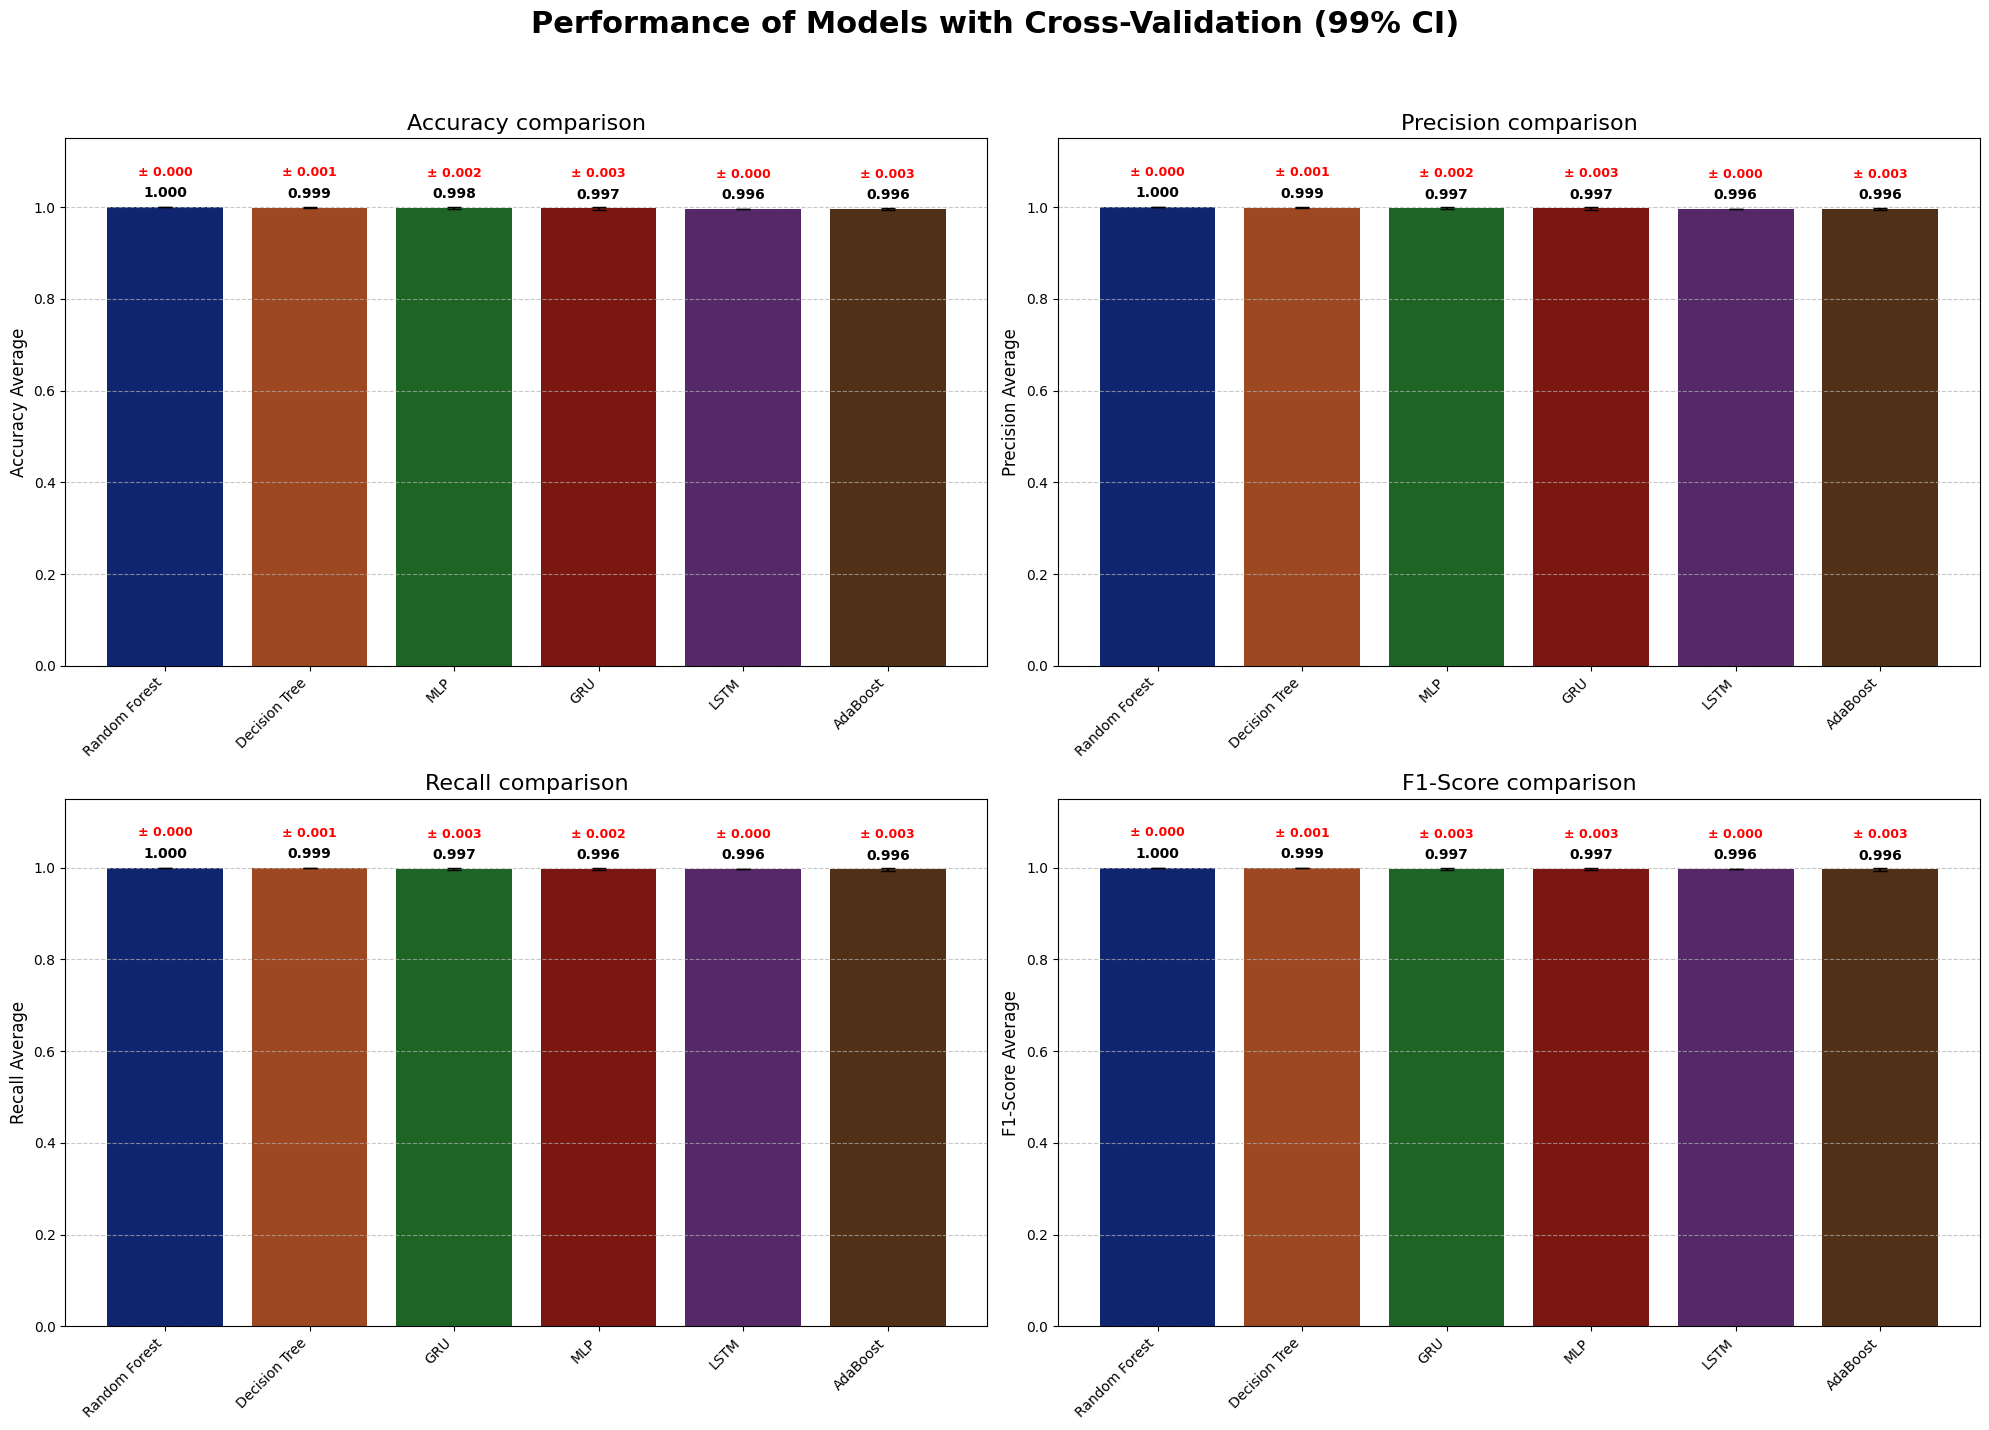

In [ ]:
# métricas plotar
metricas_a_plotar = ["Accuracy", "Precision", "Recall", "F1-Score"]

plt.figure(figsize=(20, 15))

# subplot para cada métrica
for i, metrica in enumerate(metricas_a_plotar, 1):
    plt.subplot(2, 2, i) # Cria o i-ésimo subplot

    scores_da_metrica_atual = scores_globais[metrica]

    dados_plot = []
    for nome_modelo, scores in scores_da_metrica_atual.items():
        media = np.mean(scores)
        ic = calcular_ic_95(scores)
        dados_plot.append({"Algoritmo": nome_modelo, "Média": media, "IC": ic})

    df_plot = pd.DataFrame(dados_plot).sort_values(by="Média", ascending=False)

    ax = sns.barplot(x="Algoritmo", y="Média", data=df_plot, palette="dark")

    plt.errorbar(x=df_plot["Algoritmo"], y=df_plot["Média"], yerr=df_plot["IC"],
                 fmt='none', c='black', capsize=5)

    for j, p in enumerate(ax.patches):
        media_valor = p.get_height()

        ic_valor = df_plot['IC'].iloc[j]

        ax.annotate(f'{media_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor),
                    ha='center', va='center',
                    xytext=(0, 10), textcoords='offset points',
                    fontsize=10, fontweight='bold')

        ax.annotate(f'± {ic_valor:.3f}',
                    (p.get_x() + p.get_width() / 2., media_valor), 
                    ha='center', va='center',
                    xytext=(0, 25), textcoords='offset points', 
                    fontsize=9, color='red', fontweight='bold')

    # Configurações de cada subplot
    plt.title(f"{metrica} comparison", fontsize=16)
    plt.ylim(0, 1.15) # Aumentei um pouco o limite para o texto caber melhor
    plt.xlabel(None)
    plt.ylabel(f"{metrica} Average", fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

# título para a figura
plt.suptitle("Performance of Models with Cross-Validation (99% CI)", fontsize=22, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Exporta o arquivo .joblib, este é usado dentro do dispositivo de borda para implementar a AI no sistema proposto.
joblib.dump(modelMLP, '/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_mlp.joblib')
joblib.dump(svm, '/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_svm.joblib')
# joblib.dump(modelLSTM, '/content/drive/MyDrive/Colab Notebooks/Wiley-POSEIDDON/CEN28/CICIDS2017_lstm.joblib')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_lstm.h5')
modelLSTM.save('/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_lstm.keras')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_gru.h5')
model_gru.save('/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_gru.keras')
joblib.dump(modelDT, '/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_dt.joblib')
joblib.dump(modelRF, '/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_rf.joblib')
joblib.dump(adb, '/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_adb.joblib')

['/content/drive/MyDrive/Colab Notebooks/Wiley-POSEIDDON/CEN28/CICIDS2017_adb.joblib']

In [ ]:
modelLSTM_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_lstm.keras')
modelGRU_carregado_keras = keras.models.load_model('/poseiddon/GROUP A/CONFIGURATION 1/CICIDS2017_gru.keras')

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 9 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [157]:
converter_lstm = tf.lite.TFLiteConverter.from_keras_model(modelLSTM_carregado_keras)
converter_gru = tf.lite.TFLiteConverter.from_keras_model(modelGRU_carregado_keras)

In [158]:
converter_lstm.optimizations = [tf.lite.Optimize.DEFAULT]
converter_gru.optimizations = [tf.lite.Optimize.DEFAULT]

In [159]:
# Para o modelo LSTM
print("--- Hiperparâmetros e Estrutura LSTM ---")
modelLSTM.summary()

# Para o modelo GRU
print("\n--- Hiperparâmetros e Estrutura GRU ---")
modelGRU.summary()

--- Hiperparâmetros e Estrutura LSTM ---


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 100, 256)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_18 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 100, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_19 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 100, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_20 (ReLU)                 │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_6      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 746,507 (2.85 MB)

 Trainable params: 248,451 (970.51 KB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 496,904 (1.90 MB)


--- Hiperparâmetros e Estrutura GRU ---


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_12 (GRU)                    │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,267 (688.55 KB)

 Trainable params: 58,755 (229.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 117,512 (459.04 KB)

In [ ]:
import time
import numpy as np

# funcao para calcular os tempos de inferencia dos modelos
def calcular_tempo_inferencia(modelo, dados_para_teste):

  modelo.predict(dados_para_teste[:1])

  tempos = []
  for _ in range(100): # Número de repetições para a medição
      inicio = time.perf_counter()
      modelo.predict(dados_para_teste)
      fim = time.perf_counter()
      tempos.append(fim - inicio)

  tempo_medio_lote_ms = np.mean(tempos) * 1000
  tempo_por_previsao_ms = tempo_medio_lote_ms / len(dados_para_teste)

  return tempo_por_previsao_ms

In [ ]:
dicionario_modelos = {
    "MLP": modelMLP,
    "GRU": model_gru,
    "Árvores de Decisão": modelDT,
    "Florestas Aleatórias": modelRF,
    "AdaBoost": adb,
    "LSTM": modelLSTM,
}

amostra_base_2d = x_test[:1000]


amostra_base_3d = amostra_base_2d.reshape((amostra_base_2d.shape[0], amostra_base_2d.shape[1], 1))

tempos_resultados = {}

# calcular o tempo de cada modelo
for nome_modelo, objeto_modelo in tqdm(dicionario_modelos.items()):
    print(f"Calculando tempo para o modelo: {nome_modelo}...")

    if nome_modelo in ["LSTM", "GRU"]:
        dados_para_teste = amostra_base_3d # array 3D
    else:
        dados_para_teste = amostra_base_2d # array 2D

    tempo_ms = calcular_tempo_inferencia(objeto_modelo, dados_para_teste)
    tempos_resultados[nome_modelo] = tempo_ms
    print(f"-> Tempo por previsão: {tempo_ms:.6f} ms\n")

print("\n--- Dicionário Final com os Tempos de Inferência ---")
print(tempos_resultados)

  0%|          | 0/6 [00:00<?, ?it/s]

Calculando tempo para o modelo: MLP...


 17%|█▋        | 1/6 [00:00<00:02,  2.43it/s]

-> Tempo por previsão: 0.004112 ms

Calculando tempo para o modelo: GRU...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

 33%|███▎      | 2/6 [00:17<00:41, 10.32s/it]

-> Tempo por previsão: 0.171504 ms

Calculando tempo para o modelo: Árvores de Decisão...
-> Tempo por previsão: 0.000278 ms

Calculando tempo para o modelo: Florestas Aleatórias...


 67%|██████▋   | 4/6 [00:18<00:08,  4.15s/it]

-> Tempo por previsão: 0.009269 ms

Calculando tempo para o modelo: AdaBoost...


 83%|████████▎ | 5/6 [00:20<00:03,  3.33s/it]

-> Tempo por previsão: 0.014972 ms

Calculando tempo para o modelo: LSTM...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
32/32

100%|██████████| 6/6 [00:33<00:00,  5.56s/it]

-> Tempo por previsão: 0.128149 ms


--- Dicionário Final com os Tempos de Inferência ---
{'MLP': 0.004112176040007398, 'GRU': 0.17150401235001936, 'Árvores de Decisão': 0.0002781683899956988, 'Florestas Aleatórias': 0.00926860679998299, 'AdaBoost': 0.014972025379961451, 'LSTM': 0.12814948358999118}


In [ ]:
# convertendo dicionário para um DataFrame
df_tempos = pd.DataFrame(list(tempos_resultados.items()), columns=['Modelo', 'Tempo de Detecção (ms)'])

# reordenando
df_tempos = df_tempos.sort_values(by='Tempo de Detecção (ms)', ascending=True)

In [ ]:
df_tempos.to_csv('/poseiddon/GROUP A/CONFIGURATION 1/tempos_deteccao_cic2017.csv', index=False)

In [166]:
df_resultados = data_score.copy()

In [167]:
df_resultados.rename(columns={'Algoritmo': 'Algorithm', 'Precisão': 'Precision', 'Acurácia': 'Accuracy', 'Sensibilidade':'Recall'}, inplace=True)
df_resultados.head()

Accuracy  \
LSTM                                          0.9963636363636363   
MLP            [1.0, 0.9993939393939394, 0.9987878787878788, ...   
Naive Bayes    [0.9412121212121212, 0.9381818181818182, 0.94,...   
Decision Tree  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   

                                                       Precision  \
LSTM                                          0.9963689236740912   
MLP            [0.9969839483037581, 0.9957673671833762, 0.995...   
Naive Bayes    [0.945960808346787, 0.9430394736790874, 0.9440...   
Decision Tree  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Random Forest  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   

                                                          Recall  \
LSTM                                          0.9963636363636363   
MLP            [0.9981818181818182, 0.9975757575757576, 0.995...   
Naive Bayes    [0.9412121212121212, 0.9381818181818182, 0.94,...   
Decision Tree  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   

                                                        F1-Score  
LSTM                                          0.9963613257170431  
MLP            [0.9963613924070923, 0.9963635808200191, 0.995...  
Naive Bayes    [0.9406384901598578, 0.9370803045597373, 0.939...  
Decision Tree  [0.9987878782870019, 0.9987878747808532, 1.0, ...  
Random Forest  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...

In [168]:
df_tempos.rename(columns={'Modelo': 'Model', 'Tempo de Detecção (ms)': 'Model Inference (ms)'}, inplace=True)
df_tempos.head(10)

Model  Model Inference (ms)
2    Árvores de Decisão              0.000278
0                   MLP              0.004112
3  Florestas Aleatórias              0.009269
4              AdaBoost              0.014972
5                  LSTM              0.128149
1                   GRU              0.171504

In [169]:
# 1. Certifique-se de que a coluna 'Model' é o índice
df_temp = df_tempos.set_index('Model')

# 2. Define os algoritmos a serem removidos
algoritmos_a_remover = ['SVM', 'Naive Bayes']

# Filtra o DataFrame original (df_tempos) para manter o que NÃO está na lista
df_filtrado = df_tempos[~df_tempos['Model'].isin(algoritmos_a_remover)].copy()

In [ ]:

nova_ordem = [
    'LSTM',
    'MLP',
    'Árvores de Decisão',
    'Florestas Aleatórias',
    'AdaBoost',
    'GRU'
]

df_reordenado = df_filtrado.set_index('Model')
df_reordenado = df_reordenado.reindex(nova_ordem)
df_reordenado = df_reordenado.reset_index()
print(df_reordenado)

                  Model  Model Inference (ms)
0                  LSTM              0.128149
1                   MLP              0.004112
2    Árvores de Decisão              0.000278
3  Florestas Aleatórias              0.009269
4              AdaBoost              0.014972
5                   GRU              0.171504


In [171]:
dt = pd.concat([df_resultados, df_reordenado['Model Inference (ms)']], axis=1)
dt.head()

Accuracy  \
LSTM                                          0.9963636363636363   
MLP            [1.0, 0.9993939393939394, 0.9987878787878788, ...   
Naive Bayes    [0.9412121212121212, 0.9381818181818182, 0.94,...   
Decision Tree  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   

                                                       Precision  \
LSTM                                          0.9963689236740912   
MLP            [0.9969839483037581, 0.9957673671833762, 0.995...   
Naive Bayes    [0.945960808346787, 0.9430394736790874, 0.9440...   
Decision Tree  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Random Forest  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   

                                                          Recall  \
LSTM                                          0.9963636363636363   
MLP            [0.9981818181818182, 0.9975757575757576, 0.995...   
Naive Bayes    [0.9412121212121212, 0.9381818181818182, 0.94,...   
Decision Tree  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
Random Forest  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   

                                                        F1-Score  \
LSTM                                          0.9963613257170431   
MLP            [0.9963613924070923, 0.9963635808200191, 0.995...   
Naive Bayes    [0.9406384901598578, 0.9370803045597373, 0.939...   
Decision Tree  [0.9987878782870019, 0.9987878747808532, 1.0, ...   
Random Forest  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...   

               Model Inference (ms)  
LSTM                            NaN  
MLP                             NaN  
Naive Bayes                     NaN  
Decision Tree                   NaN  
Random Forest                   NaN

In [ ]:
mapeamento_nomes = {
    'Decision Tree': 'Árvores de Decisão',
    'Random Forest': 'Florestas Aleatórias'
}

df_resultados.rename(index=mapeamento_nomes, inplace=True)


nova_ordem = [
    'LSTM',
    'MLP',
    'Árvores de Decisão',
    'Florestas Aleatórias',
    'AdaBoost',
    'GRU'
]

inference_series_aligned = df_filtrado.set_index('Model').reindex(nova_ordem)['Model Inference (ms)']

modelos_a_manter = inference_series_aligned.index.tolist()

df_metricas_sincronizadas = df_resultados.reindex(modelos_a_manter)

dt = pd.concat([df_metricas_sincronizadas, inference_series_aligned], axis=1)

print("DataFrame Final Corrigido (dt):")
print(dt)

DataFrame Final Corrigido (dt):
                                                               Accuracy  \
LSTM                                                 0.9963636363636363   
MLP                   [1.0, 0.9993939393939394, 0.9987878787878788, ...   
Árvores de Decisão    [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Florestas Aleatórias  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
AdaBoost              [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU                   [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                              Precision  \
LSTM                                                 0.9963689236740912   
MLP                   [0.9969839483037581, 0.9957673671833762, 0.995...   
Árvores de Decisão    [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Florestas Aleatórias  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   
AdaBoost              [0.9957706749385861, 0.9909671363719603, 0.99

In [ ]:
dt.index.name = 'Algorithm'
dt.head(10)

Accuracy  \
Algorithm                                                                 
LSTM                                                 0.9963636363636363   
MLP                   [1.0, 0.9993939393939394, 0.9987878787878788, ...   
Árvores de Decisão    [0.9993939393939394, 0.9981818181818182, 1.0, ...   
Florestas Aleatórias  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
AdaBoost              [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU                   [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                              Precision  \
Algorithm                                                                 
LSTM                                                 0.9963689236740912   
MLP                   [0.9969839483037581, 0.9957673671833762, 0.995...   
Árvores de Decisão    [0.9993950393224441, 0.9975779574327669, 1.0, ...   
Florestas Aleatórias  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   
AdaBoost              [0.9957706749385861, 0.9909671363719603, 0.996...   
GRU                   [0.996969696969697, 0.9992441738400168, 0.9992...   

                                                                 Recall  \
Algorithm                                                                 
LSTM                                                 0.9963636363636363   
MLP                   [0.9981818181818182, 0.9975757575757576, 0.995...   
Árvores de Decisão    [0.9987878787878788, 0.9981818181818182, 1.0, ...   
Florestas Aleatórias  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
AdaBoost              [0.9957575757575757, 0.990909090909091, 0.9969...   
GRU                   [0.996969696969697, 0.9992424242424243, 0.9992...   

                                                               F1-Score  \
Algorithm                                                                 
LSTM                                                 0.9963613257170431   
MLP                   [0.9963613924070923, 0.9963635808200191, 0.995...   
Árvores de Decisão    [0.9987878782870019, 0.9987878747808532, 1.0, ...   
Florestas Aleatórias  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...   
AdaBoost              [0.9957569846786611, 0.9909070288215633, 0.996...   
GRU                   [0.996969696969697, 0.9992424481716625, 0.9992...   

                      Model Inference (ms)  
Algorithm                                   
LSTM                              0.128149  
MLP                               0.004112  
Árvores de Decisão                0.000278  
Florestas Aleatórias              0.009269  
AdaBoost                          0.014972  
GRU                               0.171504

In [ ]:

dt_final_alinhado = dt.reset_index()

dt_final_alinhado.head(6)

Algorithm                                           Accuracy  \
0                  LSTM                                 0.9963636363636363   
1                   MLP  [1.0, 0.9993939393939394, 0.9987878787878788, ...   
2    Árvores de Decisão  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
3  Florestas Aleatórias  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
4              AdaBoost  [0.9957575757575757, 0.990909090909091, 0.9969...   
5                   GRU  [0.996969696969697, 0.9992424242424243, 0.9992...   

                                           Precision  \
0                                 0.9963689236740912   
1  [0.9969839483037581, 0.9957673671833762, 0.995...   
2  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
3  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   
4  [0.9957706749385861, 0.9909671363719603, 0.996...   
5  [0.996969696969697, 0.9992441738400168, 0.9992...   

                                              Recall  \
0                                 0.9963636363636363   
1  [0.9981818181818182, 0.9975757575757576, 0.995...   
2  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
3  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
4  [0.9957575757575757, 0.990909090909091, 0.9969...   
5  [0.996969696969697, 0.9992424242424243, 0.9992...   

                                            F1-Score  Model Inference (ms)  
0                                 0.9963613257170431              0.128149  
1  [0.9963613924070923, 0.9963635808200191, 0.995...              0.004112  
2  [0.9987878782870019, 0.9987878747808532, 1.0, ...              0.000278  
3  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...              0.009269  
4  [0.9957569846786611, 0.9909070288215633, 0.996...              0.014972  
5  [0.996969696969697, 0.9992424481716625, 0.9992...              0.171504

In [175]:
dt_final_alinhado.insert(0, 'Configuration', 'Configuration 1')
dt_final_alinhado.head()

Configuration             Algorithm  \
0  Configuration 1                  LSTM   
1  Configuration 1                   MLP   
2  Configuration 1    Árvores de Decisão   
3  Configuration 1  Florestas Aleatórias   
4  Configuration 1              AdaBoost   

                                            Accuracy  \
0                                 0.9963636363636363   
1  [1.0, 0.9993939393939394, 0.9987878787878788, ...   
2  [0.9993939393939394, 0.9981818181818182, 1.0, ...   
3  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
4  [0.9957575757575757, 0.990909090909091, 0.9969...   

                                           Precision  \
0                                 0.9963689236740912   
1  [0.9969839483037581, 0.9957673671833762, 0.995...   
2  [0.9993950393224441, 0.9975779574327669, 1.0, ...   
3  [0.9993950393224441, 1.0, 1.0, 0.9993950393224...   
4  [0.9957706749385861, 0.9909671363719603, 0.996...   

                                              Recall  \
0                                 0.9963636363636363   
1  [0.9981818181818182, 0.9975757575757576, 0.995...   
2  [0.9987878787878788, 0.9981818181818182, 1.0, ...   
3  [0.9993939393939394, 1.0, 1.0, 0.9993939393939...   
4  [0.9957575757575757, 0.990909090909091, 0.9969...   

                                            F1-Score  Model Inference (ms)  
0                                 0.9963613257170431              0.128149  
1  [0.9963613924070923, 0.9963635808200191, 0.995...              0.004112  
2  [0.9987878782870019, 0.9987878747808532, 1.0, ...              0.000278  
3  [0.9993939388930625, 1.0, 1.0, 0.9993939388930...              0.009269  
4  [0.9957569846786611, 0.9909070288215633, 0.996...              0.014972

In [ ]:
dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 1/all_results_cic2017_conf01.csv')
dt.to_csv('/poseiddon/GROUP A/CONFIGURATION 1/all_results_cic2017_conf01.csv')

# Teste do modelo treinado com CIC2017 no dataset CIC 2018

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['Fwd Seg Size Min', 'Active Min', 'Dst Port_SMA_12', 'Dst Port_EMA_12',
       'Bwd Pkt Len Max_SMA_6', 'Bwd Pkt Len Max_EMA_6',
       'Bwd Pkt Len Max_SMA_9', 'Bwd Pkt Len Max_EMA_9',
       'Bwd Pkt Len Max_SMA_12', 'Bwd Pkt Len Max_EMA_12',
       'Bwd Pkt Len Mean_SMA_12', 'Bwd Pkt Len Mean_EMA_12',
       'Bwd Seg Size Avg_SMA_12', 'Bwd Seg Size Avg_EMA_12',
       'Fwd Seg Size Min_SMA_3', 'Fwd Seg Size Min_EMA_3',
       'Fwd Seg Size Min_SMA_6', 'Fwd Seg Size Min_EMA_6',
       'Fwd Seg Size Min_SMA_9', 'Fwd Seg Size Min_EMA_9',
       'Fwd Seg Size Min_SMA_12', 'Fwd Seg Size Min_EMA_12',
       'Active Mean_EMA_12', 'Active Std_EMA_9', 'Active Std_SMA_12',
       'Active Std_EMA_12', 'Active Min_SMA_3', 'Active Min_EMA_3',
       'Active Min_SMA_6', 'Active Min_EMA_6', 'Active Min_SMA_9',
       'Active Min_EMA_9', 'Active Min_SMA_12', 'Activ

/tmp/ipython-input-555323307.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt['Label'] = dt['Label'].replace(['DoS attacks-Slowloris'], 2)


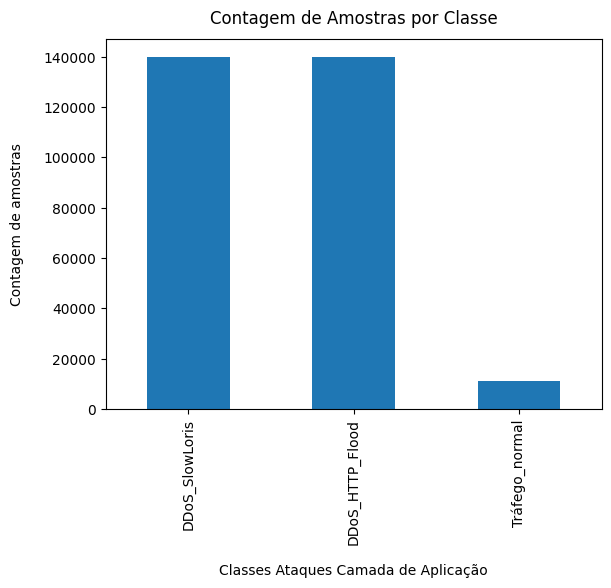

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:442: InconsistentVersionWarning: Trying to unpickle estimator GaussianNB from version 1.7.1 when using version 1.7.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Modelo LSTM carregado com sucesso do arquivo .h5!


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 100, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 100, 256)       │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_18 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 100, 256)       │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_19          │ (None, 100, 256)       │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_19 (ReLU)                 │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 100, 64)        │        49,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 100, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_20 (ReLU)                 │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_6      │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,605 (975.02 KB)

 Trainable params: 248,451 (970.51 KB)

 Non-trainable params: 1,152 (4.50 KB)

 Optimizer params: 2 (12.00 B)

Modelo LSTM carregado com sucesso do arquivo .h5!


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_11 (GRU)                    │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,757 (229.52 KB)

 Trainable params: 58,755 (229.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

/tmp/ipython-input-1525930610.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  label = label.replace(['DoS attacks-Slowloris'], 2)


9087/9087 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step
9087/9087 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
Precisão do modelo de MLP: 0.9826873473879699

Relatório de Classificação:
              precision    recall  f1-score   support

           0     1.0000    0.9984    0.9992    139890
           1     0.9662    1.0000    0.9828    139890
           2     0.9786    0.5625    0.7144     10990

    accuracy                         0.9827    290770
   macro avg     0.9816    0.8536    0.8988    290770
weighted avg     0.9829    0.9827    0.9805    290770



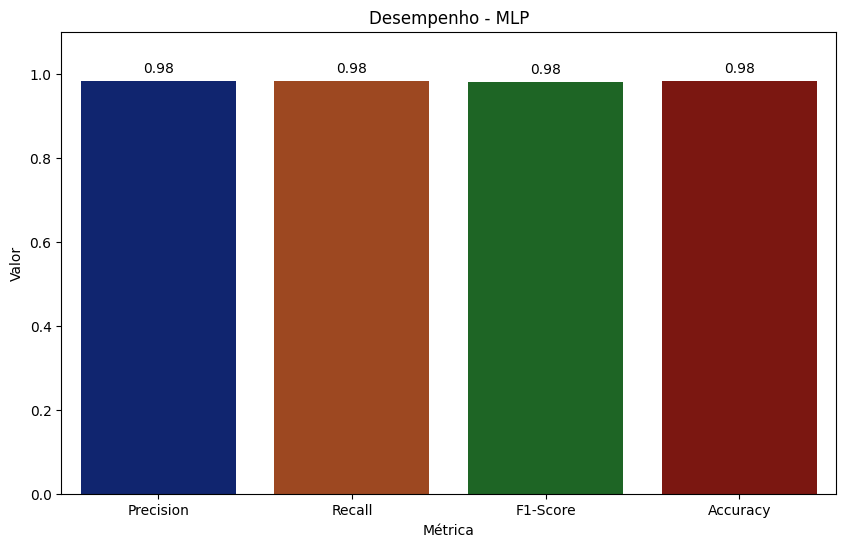

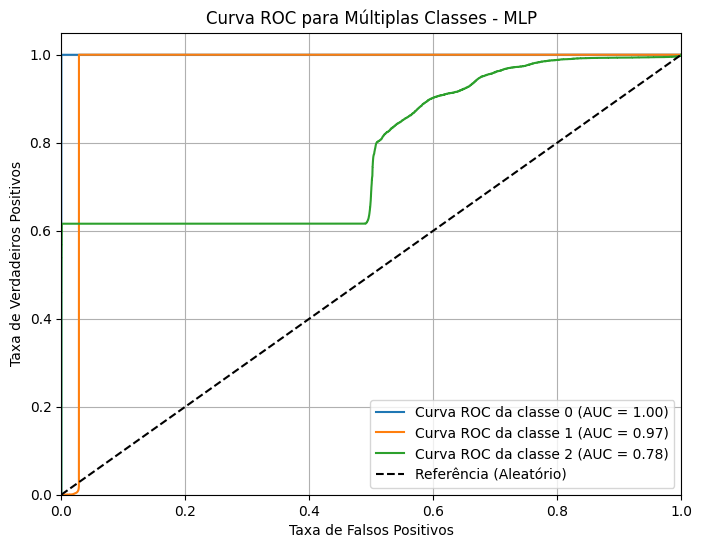

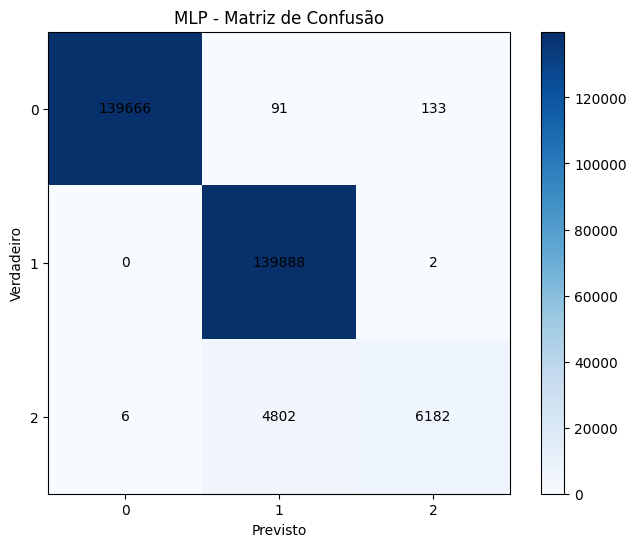

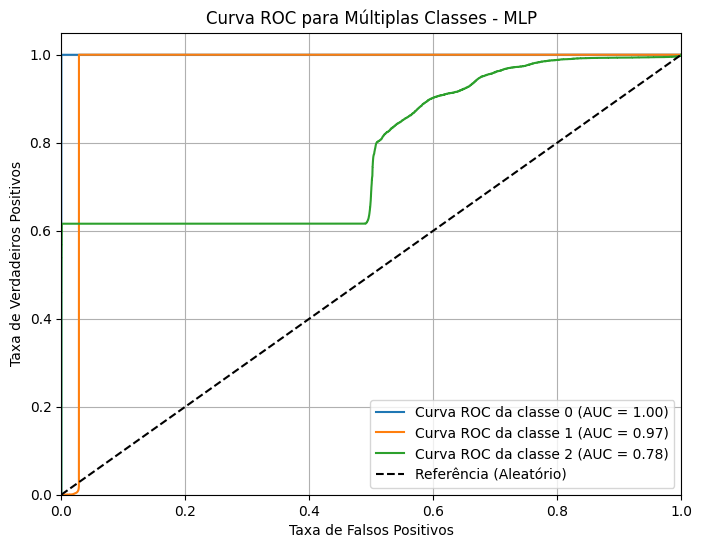

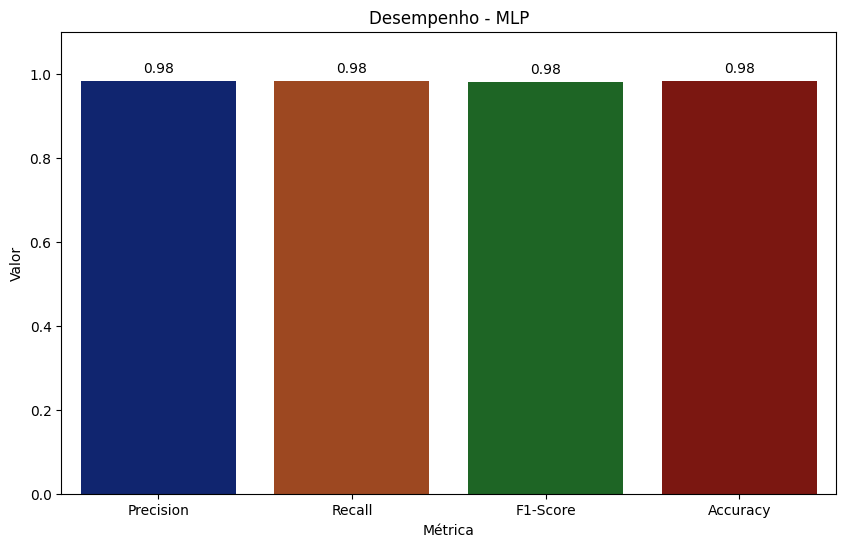

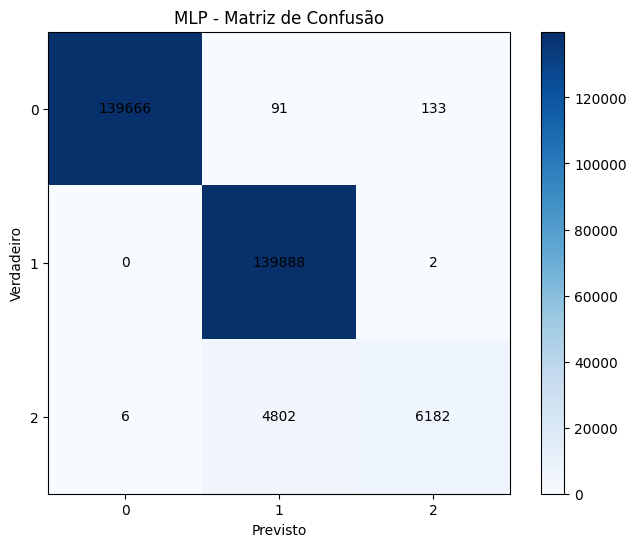

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    139890
           1       0.00      0.00      0.00    139890
           2       0.07      0.92      0.13     10990

    accuracy                           0.52    290770
   macro avg       0.36      0.64      0.38    290770
weighted avg       0.48      0.52      0.49    290770

Precisão do modelo de AdaBoost: 0.515751281081267

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9998    1.0000    0.9999    139890
           1     0.0000    0.0000    0.0000    139890
           2     0.0672    0.9170    0.1252     10990

    accuracy                         0.5158    290770
   macro avg     0.3557    0.6390    0.3750    290770
weighted avg     0.4835    0.5158    0.4858    290770



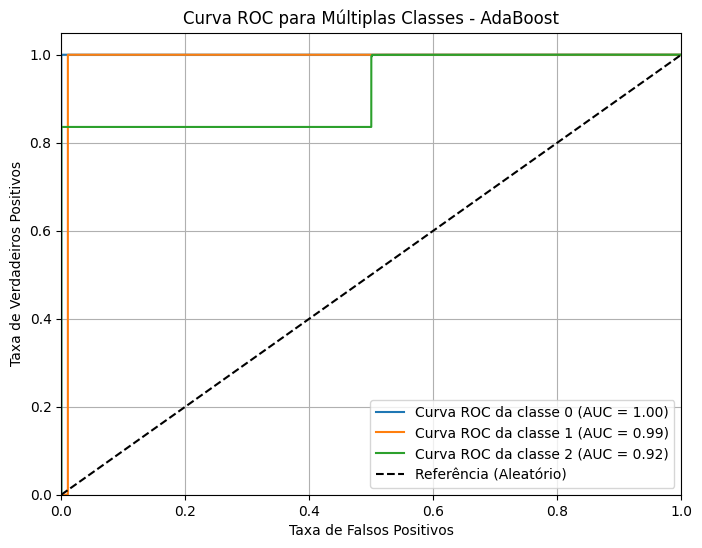

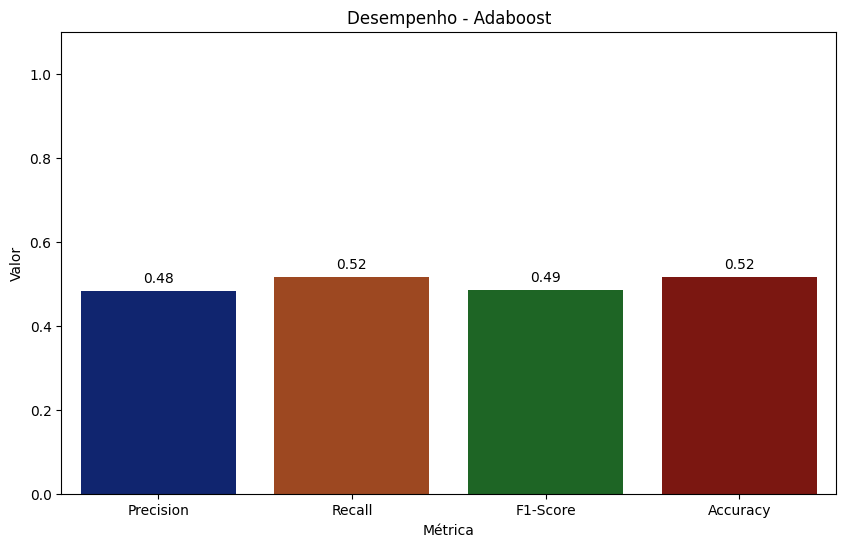

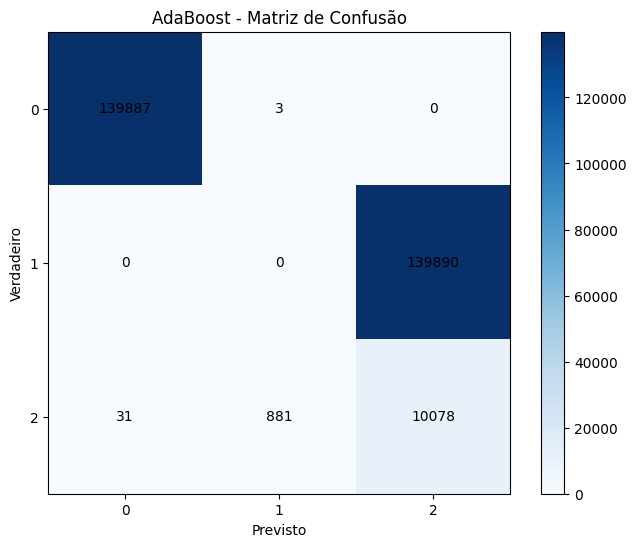

Precisão do modelo de SVM: 0.48221962375760913

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9275    1.0000    0.9624    139890
           1     0.8228    0.0023    0.0046    139890
           2     0.0000    0.0000    0.0000     10990

    accuracy                         0.4822    290770
   macro avg     0.5834    0.3341    0.3223    290770
weighted avg     0.8421    0.4822    0.4652    290770



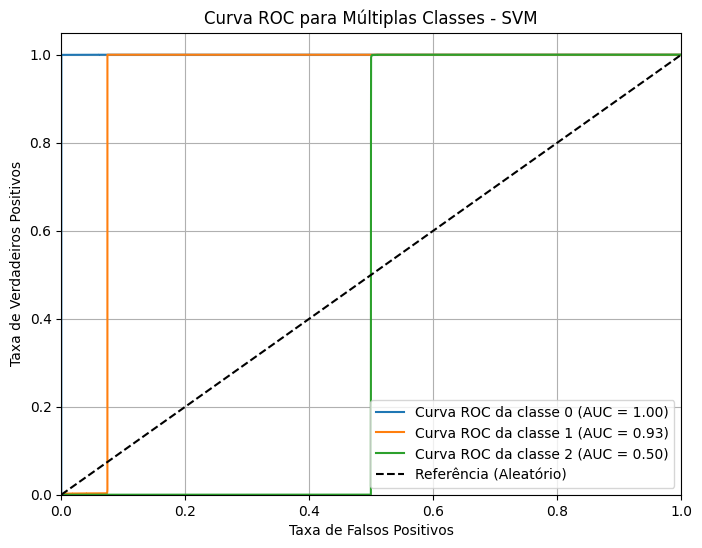

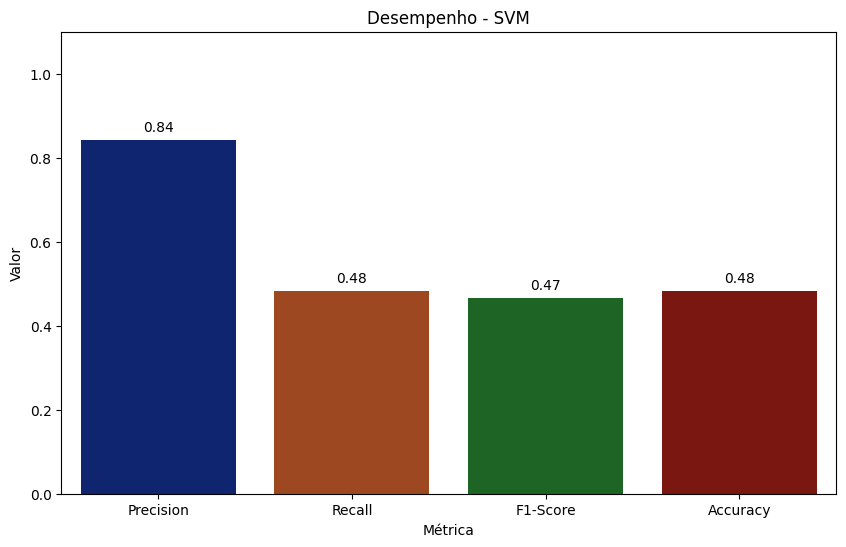

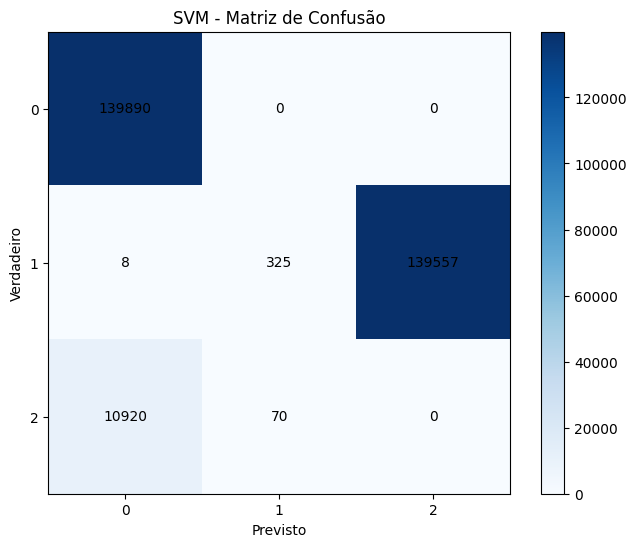

Precisão do modelo de Floresta Aleatória: 0.5167589503731471

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9997    1.0000    0.9999    139890
           1     0.0000    0.0000    0.0000    139890
           2     0.0690    0.9434    0.1286     10990

    accuracy                         0.5168    290770
   macro avg     0.3562    0.6478    0.3762    290770
weighted avg     0.4836    0.5168    0.4859    290770



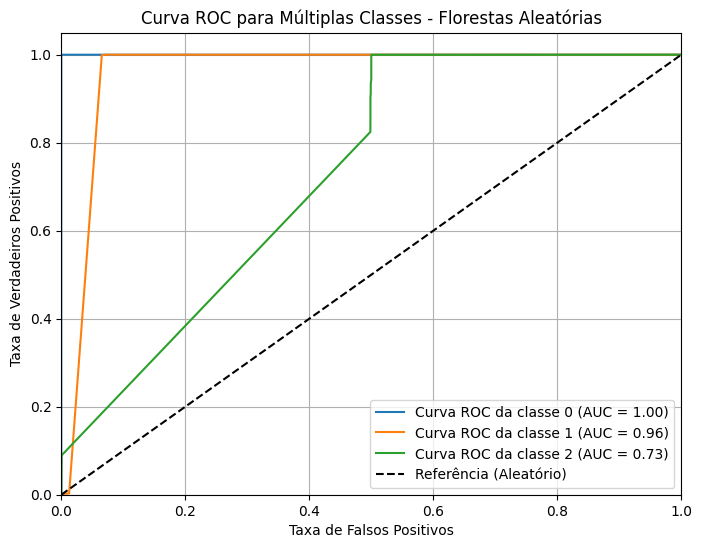

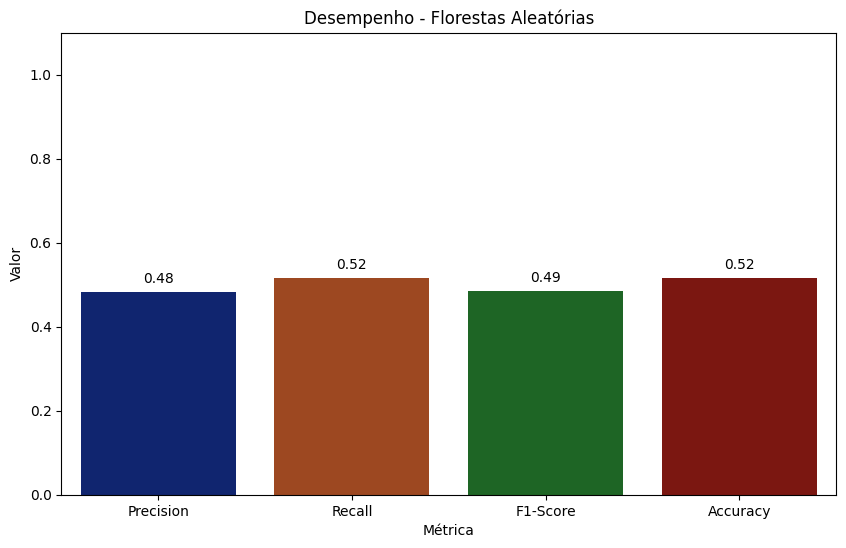

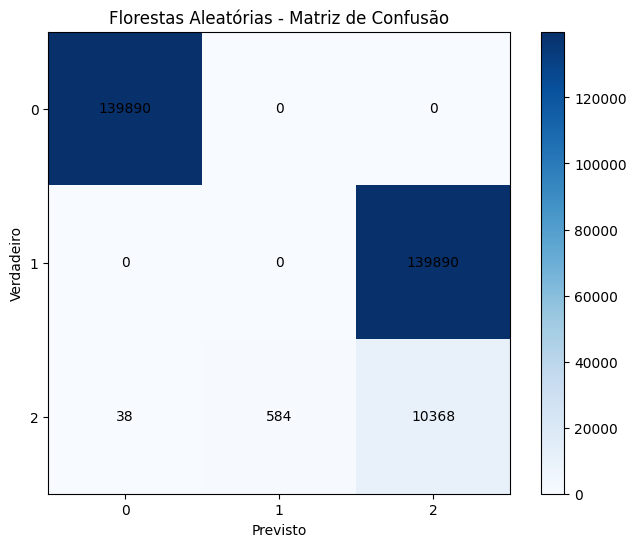

Precisão do modelo de Árvore de Decisão: 0.5172404305808714

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9999    0.9970    0.9985    139890
           1     0.0000    0.0000    0.0000    139890
           2     0.0724    0.9943    0.1350     10990

    accuracy                         0.5172    290770
   macro avg     0.3575    0.6638    0.3778    290770
weighted avg     0.4838    0.5172    0.4855    290770



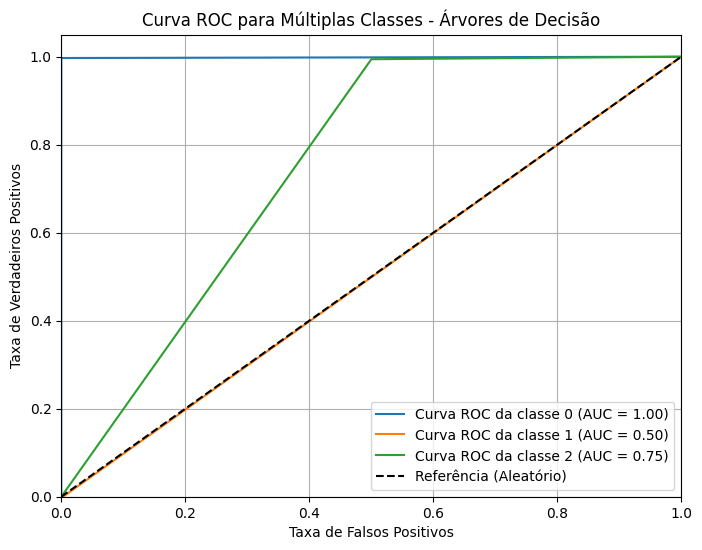

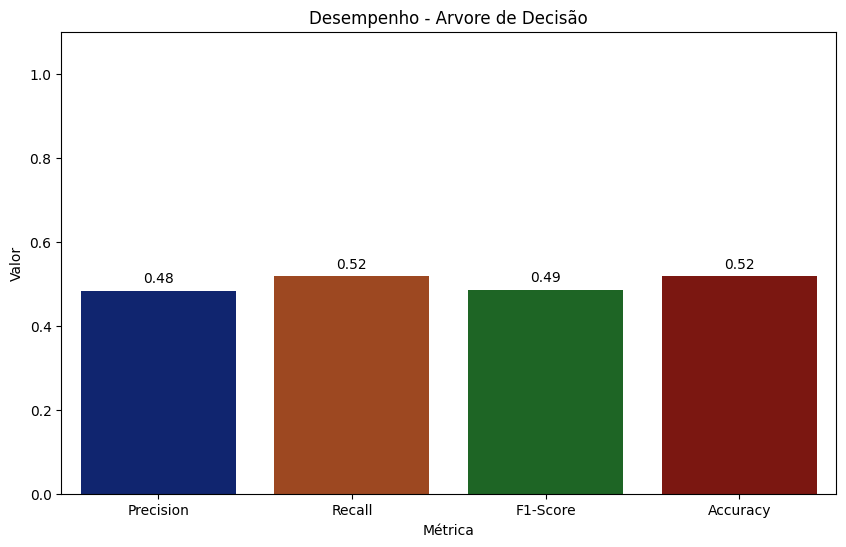

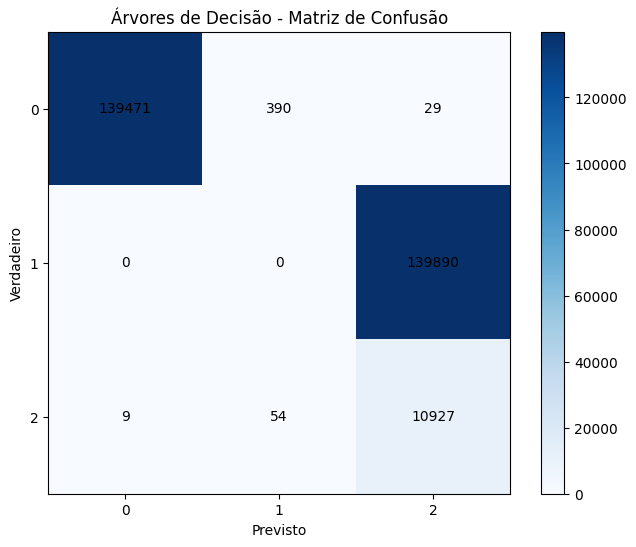

Precisão do modelo de NB: 0.4825016335935619

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.4825    0.9999    0.6509    139890
           1     0.4781    0.0030    0.0059    139890
           2     0.0000    0.0000    0.0000     10990

    accuracy                         0.4825    290770
   macro avg     0.3202    0.3343    0.2189    290770
weighted avg     0.4621    0.4825    0.3160    290770



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


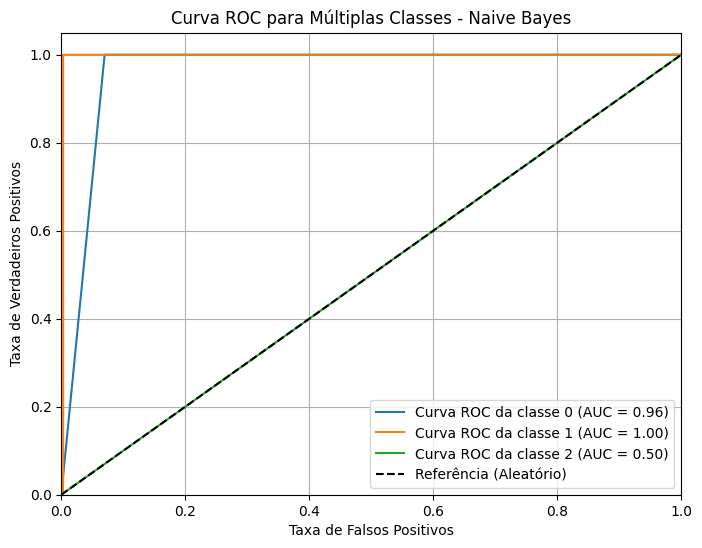

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


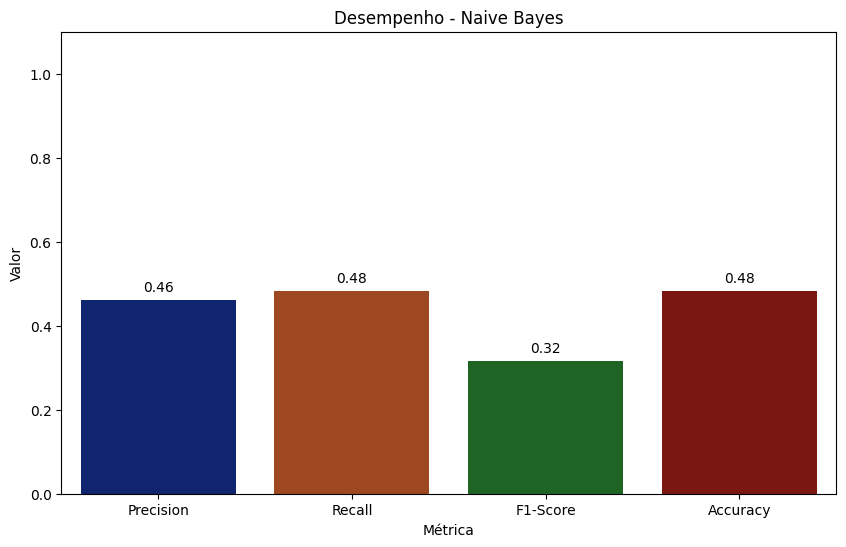

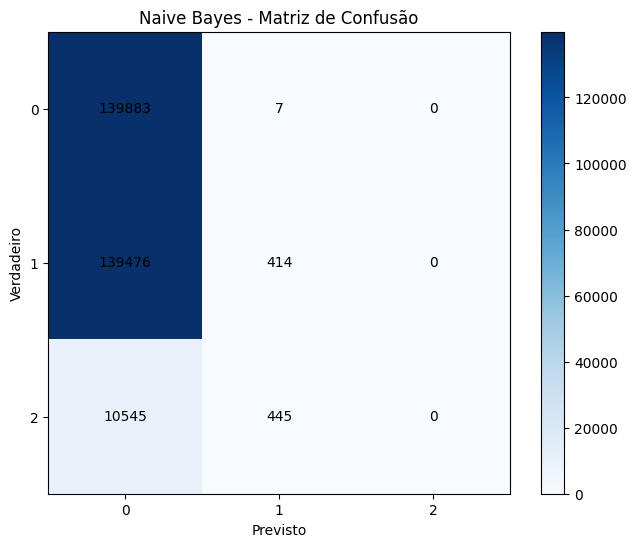

Acurácia final do GRU no teste: 0.4714


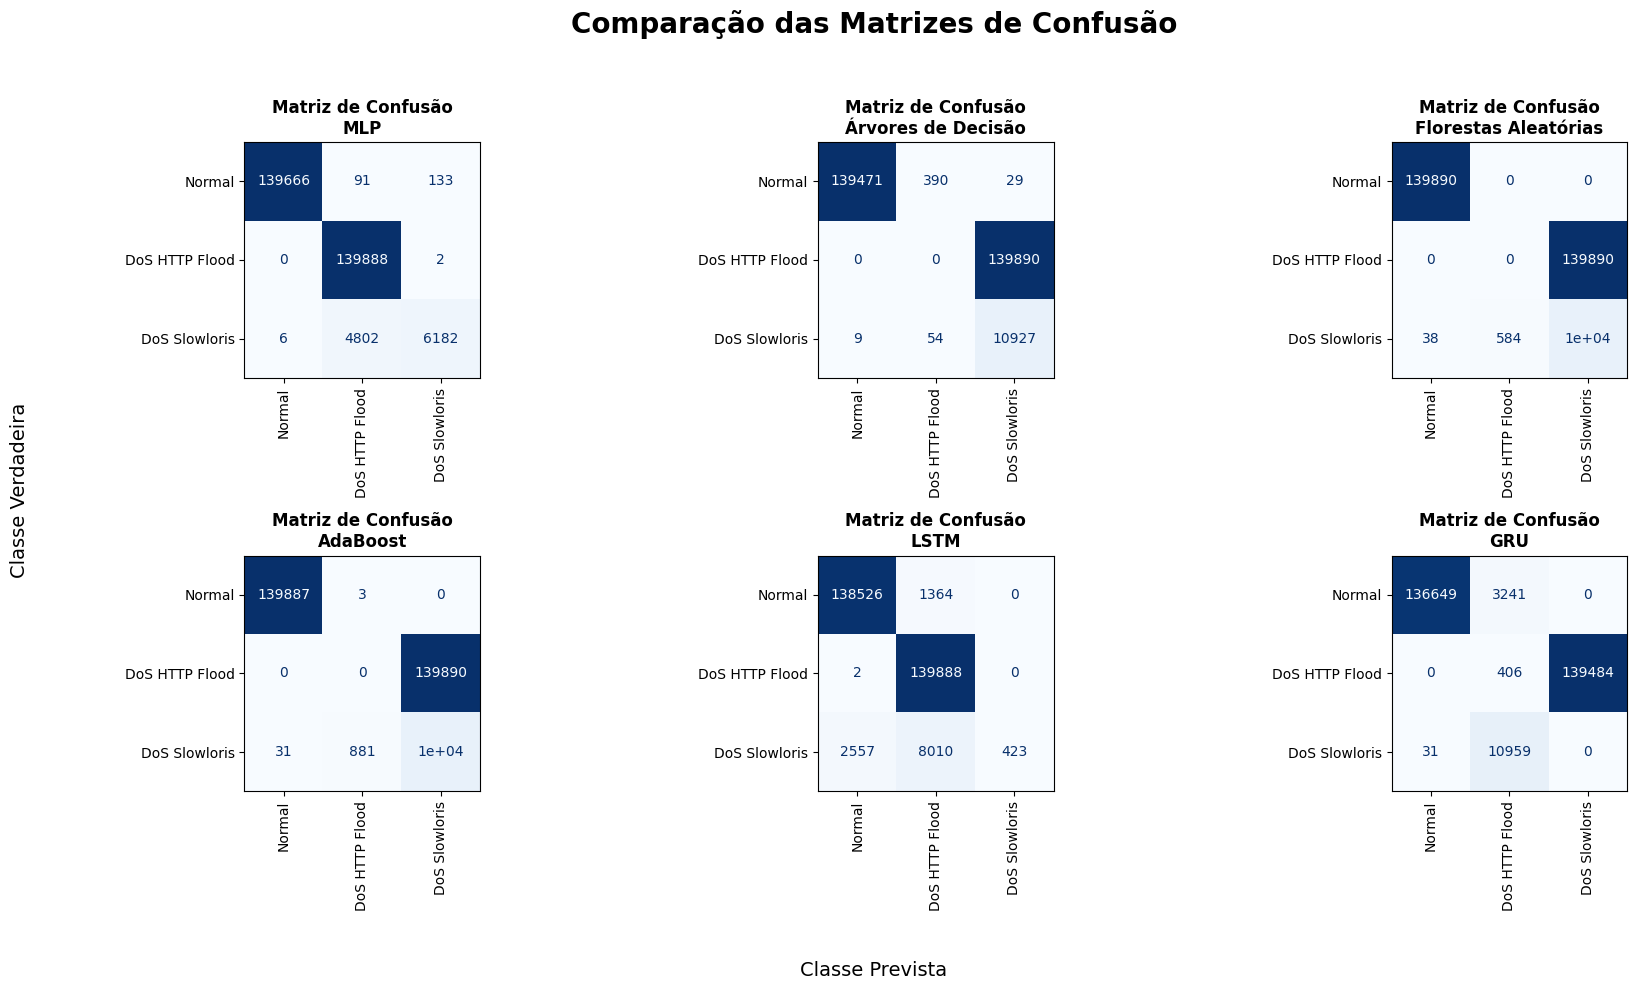

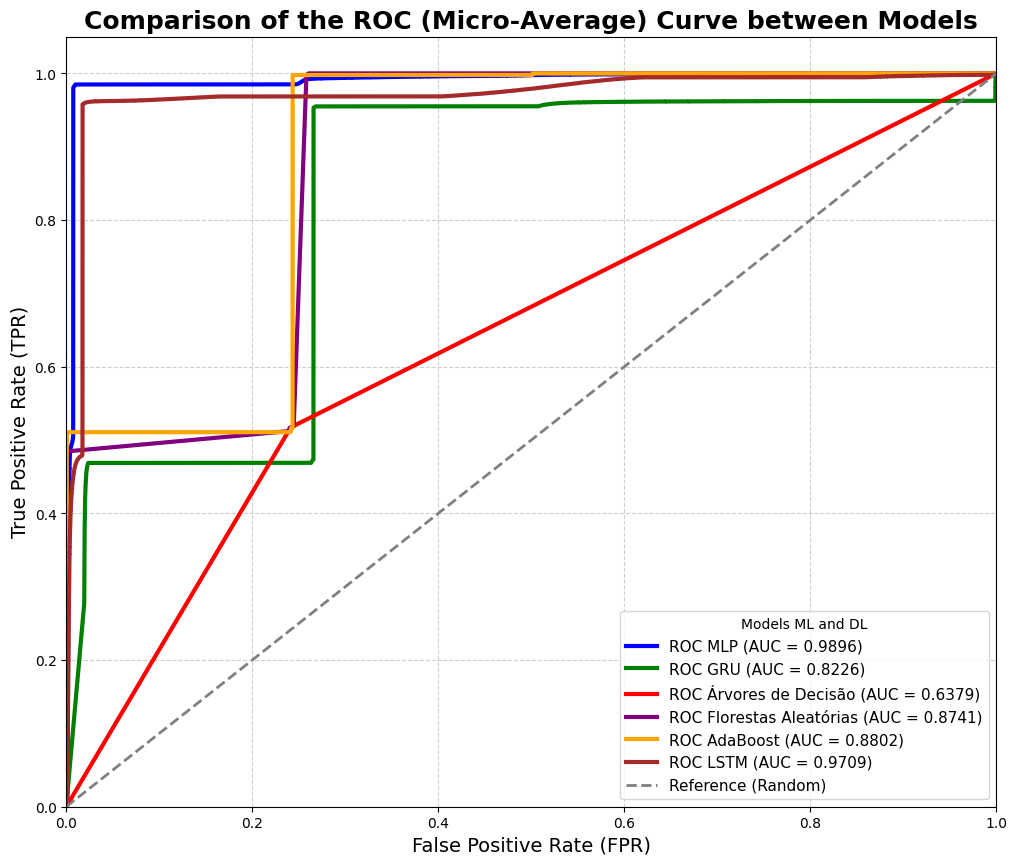

/tmp/ipython-input-972812353.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)
/tmp/ipython-input-972812353.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)
/tmp/ipython-input-972812353.py:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Algoritmo", y=metrica, data=df_resultados, palette="dark", errorbar=None)
/tmp/ipython-input-972812353.py:83: FutureWarning: 

Pa

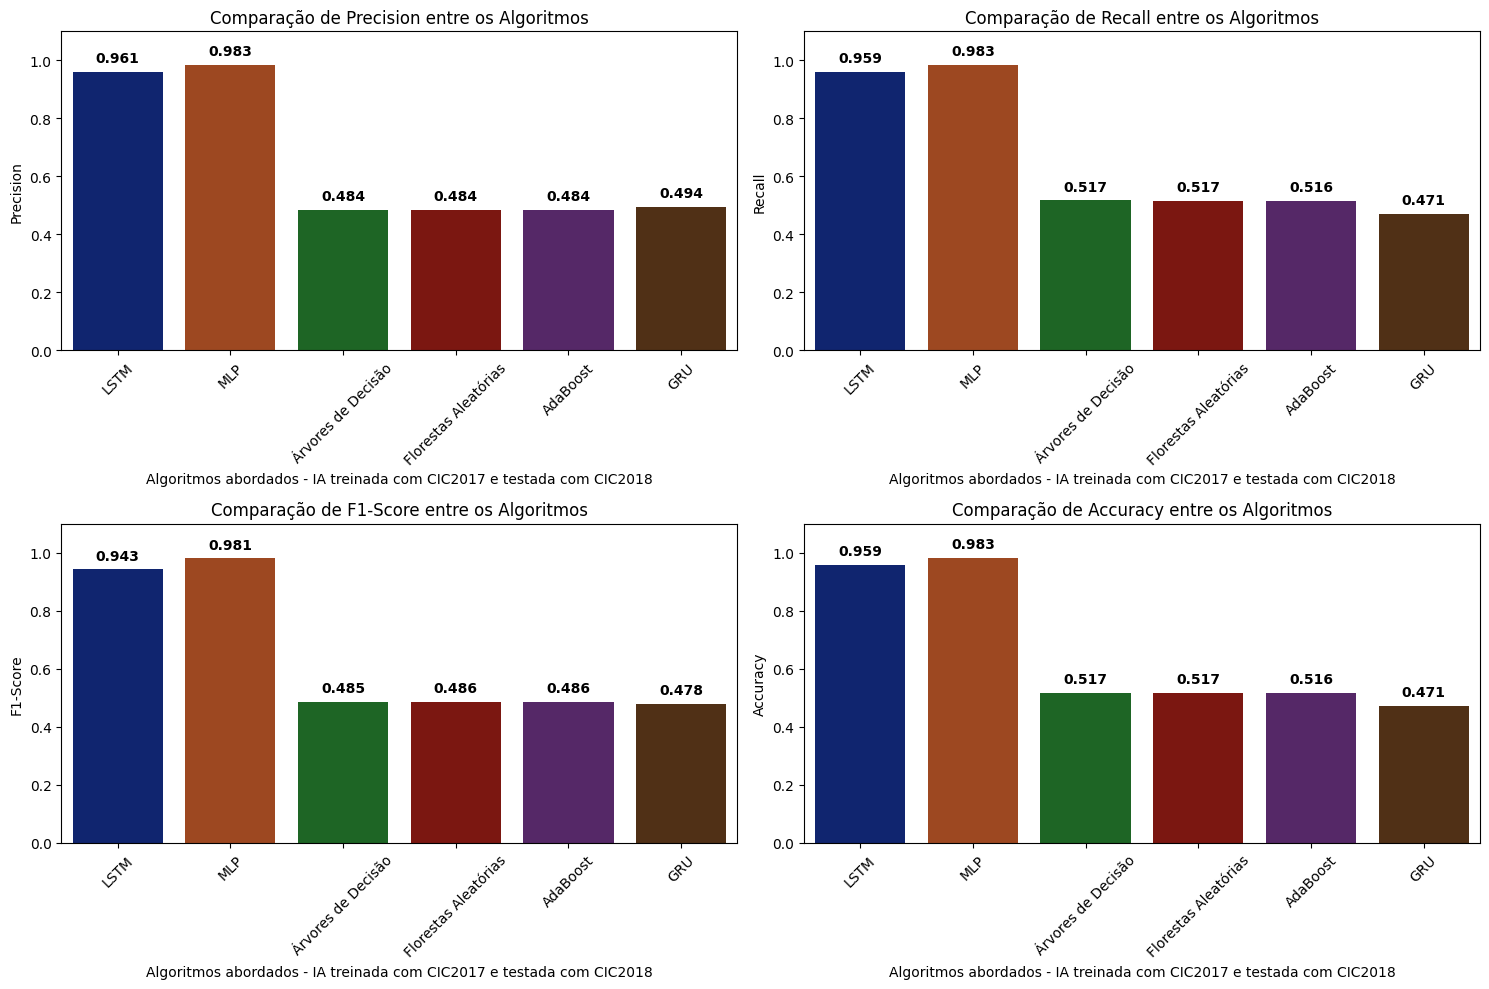

  0%|          | 0/6 [00:00<?, ?it/s]

Calculando tempo para o modelo: MLP...
-> Tempo por previsão: 0.002971 ms

Calculando tempo para o modelo: GRU...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s

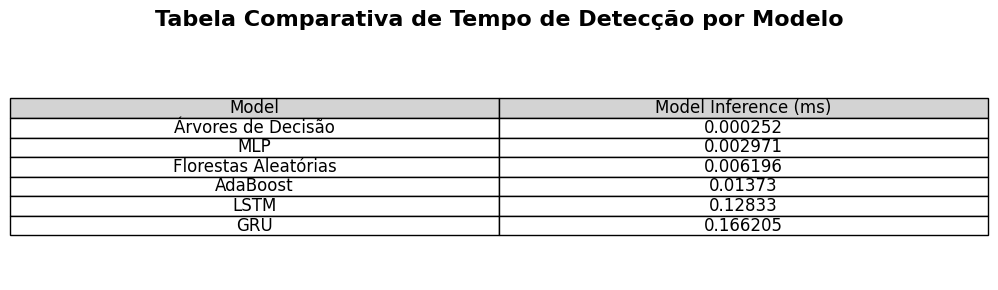

ValueError: Could not interpret value `Tempo de Detecção (ms)` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x700 with 0 Axes>

ValueError: Could not interpret value `Tempo de Detecção (ms)` for `x`. An entry with this name does not appear in `data`.

In [ ]:
%run '/poseiddon/GROUP B/CONFIGURATION 1/conf01_CIC2018_script.ipynb'